## Lending Club Case Study - Jupyter file submission - Parthesh Pujari and Sumeet Savant

## Data Understanding

#### Load the loan.csv file into a dataframe and name it loan dataframe.


In [1]:
# Import necessary libraries.

import pandas as pd
import numpy as np

from scipy import stats
from pandas.api.types import is_numeric_dtype

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import seaborn as sns 

In [2]:
# Load file loan.csv - engine='python' required to take care of the encoding error.

loan = pd.read_csv('loan.csv', engine='python')

### Identify the target variable.


In [3]:
# Check/sample the loan dataframe.

pd.options.display.max_columns = loan.shape[1]

loan.sample(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
18067,705749,897844,2000,2000,2000.0,36 months,7.66%,62.36,A,A5,Westlake Reed Leskosky,4 years,RENT,70000.0,Not Verified,Mar-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 03/17/11 > This is my seco...,moving,Silver Spring,209xx,MD,10.17,0,Nov-97,0,73.0,NaN,5,0,642,80.20%,27,f,0.0,0.0,2244.940137,2244.94,2000.0,244.94,0.0,0.0,0.0,Apr-14,71.97,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
35148,440300,533116,12000,12000,11875.0,36 months,12.53%,401.60,B,B5,JP Morgan Chase,8 years,RENT,174000.0,Source Verified,Sep-09,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,My daughter is a sophomore in high school and...,educational,Education for daughter,101xx,NY,6.33,0,Sep-84,1,NaN,NaN,7,0,38384,90.10%,12,f,0.0,0.0,14457.421730,14306.82,12000.0,2457.42,0.0,0.0,0.0,Sep-12,417.42,NaN,Apr-14,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
19661,671468,858396,16000,16000,15975.0,36 months,10.37%,519.06,B,B3,Chattahoochee Technical College,10+ years,OWN,72000.0,Source Verified,Feb-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 02/09/11 > Using money to ...,credit_card,Credit card consolodation,300xx,GA,20.48,0,Dec-82,0,NaN,NaN,23,0,18021,17.80%,47,f,0.0,0.0,18669.224980,18640.05,16000.0,2669.22,0.0,0.0,0.0,Mar-14,331.21,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4488,964950,1185701,8000,8000,8000.0,36 months,17.27%,286.30,D,D3,port jefferson unionfree school district,6 years,RENT,32000.0,Not Verified,Oct-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,debt fixing,117xx,NY,21.26,0,Sep-01,2,51.0,NaN,8,0,7567,90.10%,15,f,0.0,0.0,10306.705400,10306.71,8000.0,2306.71,0.0,0.0,0.0,Nov-14,292.86,NaN,Jul-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,N

In [4]:
# Number of rows and columns in the loan dataframe.

loan.shape

(39717, 111)

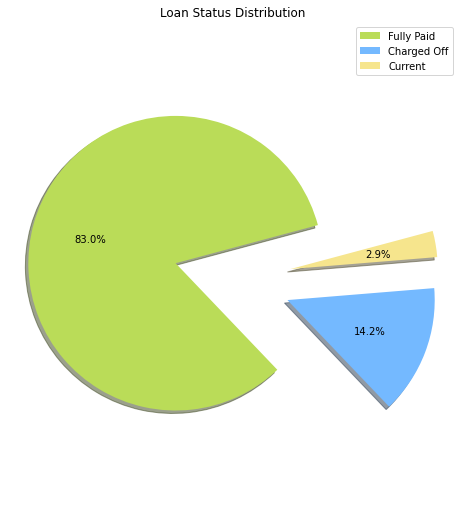

In [5]:
# Entries, counts, and distribution in the target variable.

loan.loan_status.value_counts().plot(kind='pie', 
                                     figsize=(7, 7), 
                                     legend =True,
                                     label='',
                                     labeldistance=None,
                                     autopct='%1.1f%%', 
                                     startangle=15,
                                     shadow = True, 
                                     colors=['#badc58','#74b9ff','#f6e58d'], 
                                     explode=(0.4, 0.4, 0.4)   
                                    )
plt.tight_layout()
plt.title('Loan Status Distribution')
plt.axis('equal')
plt.show()

### Observation:

#### loan_status column can be used as a target for the analysis in the loan dataframe.
    
#### loan_status column contains values 'Fully Paid', 'Charged Off' and 'Current', we are interested in 'Fully Paid', and 'Charged Off'.

In [6]:
# Loan Dataframe Describe.

loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Data Cleaning

### Missing Value Treatment I.

In [7]:
# Missing values in loan dataframe in percentage.

round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

### Observation:
    
#### loan dataframe contains more than 50% columns with all null or nan entries. We need to drop them.

In [8]:
# Drop columns with all null or nan entries. 

loan.dropna(how='all', axis=1, inplace=True)

# Check the new shape. 

loan.shape

(39717, 57)

In [9]:
# Missing values in loan dataframe in percentage.

round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

### Observation:
    
#### loan dataframe contains columns with very high percentage of missing values.

#### The columns are: 

#### mths_since_last_delinq         64.66% missing values.
#### mths_since_last_record        92.99% missing values.
#### next_pymnt_d                         97.13% missing values.

#### We need to drop them.

In [10]:
# Drop columns with more than 60% missing values.

loan.drop(['mths_since_last_delinq','mths_since_last_record', 'next_pymnt_d'], axis=1, inplace=True)

# Check the new shape. 

loan.shape

(39717, 54)

In [11]:
# List comprehension to get non unique columns; that is columns with single entry.

singlevaluecolumns = [col for col in loan if len(loan[col].unique()) == 1]

# List comprehension to check the values in the non unique columns identified.

[print(col, ' : ', loan[col].unique()) for col in singlevaluecolumns]

pymnt_plan  :  ['n']
initial_list_status  :  ['f']
policy_code  :  [1]
application_type  :  ['INDIVIDUAL']
acc_now_delinq  :  [0]
delinq_amnt  :  [0]


[None, None, None, None, None, None]

### Observation:
    
#### Columns - pymnt_plan, initial_list_status, policy_code,  application_type, acc_now_delinq, and  delinq_amnt have single values.

#### We need to drop these columns.

In [12]:
# Drop the columns with non unique (single) values.

loan.drop(singlevaluecolumns, axis=1, inplace=True)

# Check the new shape. 

loan.shape

(39717, 48)

In [13]:
# Check info for loan dataframe.

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Observation:
    
#### Most of the columns are either irrelevant or customer behavioral.

#### Remove customer behavioral and other irrelevent columns.

##### id:                                     Not relevent for analysis; ids not much meaningful for the study.
##### member_id:                     Not relevent for analysis; ids not much meaningful for the study.
##### funded_amnt:                   Not relevent for analysis; loan_amnt already considered in the analysis.
##### funded_amnt_inv:                   Not relevent for analysis; loan_amnt already considered in the analysis.
##### installment:                   Not relevent for analysis; loan_amnt already considered in the analysis.
##### emp_title:                     Not relevent for analysis; company names.
##### issue_d:                       Not relevent for analysis; Not performing time series analysis.
##### url:                           Not relevent for analysis; Not performing text analysis.
##### desc:                          Not relevent for analysis; Not performing text analysis.
##### title:                         Not relevent for analysis; purpose is more important.
##### zip_code:                      Not relevent for analysis; contains masked data.
##### addr_state:                    Not relevent for analysis; state can be ignored for risk/financial analysis.
##### delinq_2yrs:                   Customer Behavioral variable.
##### earliest_cr_line:              Not relevent for analysis; Not performing time series analysis.
##### revol_bal:                     Customer Behavioral variable.
##### out_prncp:                     Customer Behavioral variable.
##### out_prncp_inv:                 Customer Behavioral variable.
##### total_pymnt:                   Customer Behavioral variable.
##### total_pymnt_inv:               Customer Behavioral variable; related to investors.
##### total_rec_prncp:               Customer Behavioral variable.
##### total_rec_int:                 Customer Behavioral variable.
##### total_rec_late_fee:            Customer Behavioral variable.
##### recoveries:                    Customer Behavioral variable.
##### collection_recovery_fee:       Customer Behavioral variable.
##### last_pymnt_d:                  Customer Behavioral variable.
##### last_pymnt_amnt:               Customer Behavioral variable.
##### last_credit_pull_d:            Customer Behavioral variable.

In [14]:
# Remove the identified columns which are not useful.

loan.drop(['id','member_id', 'funded_amnt', 'funded_amnt_inv', 'installment', 'emp_title', 'issue_d', 'url',  'desc', 'title', 'zip_code', 'addr_state', 'delinq_2yrs', 'earliest_cr_line', 'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'], axis=1, inplace=True)

# Check the new shape. 

loan.shape

(39717, 21)

In [15]:
# Check/sample the companies dataframe.

loan.sample(10)

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
21280,7000,36 months,6.91%,A,A5,4 years,MORTGAGE,85000.0,Source Verified,Fully Paid,credit_card,8.98,0,6,0,80%,11,0.0,0.0,0.0,0.0
14513,5000,36 months,11.49%,B,B4,5 years,RENT,12000.0,Source Verified,Fully Paid,debt_consolidation,8.60,1,5,0,30.30%,8,0.0,0.0,0.0,0.0
6962,13275,36 months,15.27%,C,C4,NaN,RENT,38040.0,Verified,Charged Off,debt_consolidation,11.64,1,3,0,12.80%,20,0.0,0.0,0.0,0.0
27436,10800,36 months,11.12%,B,B3,2 years,RENT,39996.0,Source Verified,Charged Off,debt_consolidation,24.51,2,6,0,26.50%,13,0.0,0.0,0.0,0.0
5401,15000,36 months,11.71%,B,B3,4 years,OWN,65000.0,Source Verified,Fully Paid,debt_consolidation,20.70,0,20,0,49.20%,56,0.0,0.0,0.0,0.0
5423,12000,60 months,9.91%,B,B1,9 years,MORTGAGE,72000.0,Not Verified,Current,debt_consolidation,16.18,0,4,0,10%,23,0.0,0.0,0.0,0.0
36330,4000,36 months,10.95%,B,B1,1 year,RENT,61500.0,Not Verified,Fully Paid,major_purchase,18.15,1,18,0,34%,37,0.0,0.0,0.0,0.0
21772,18000,60 months,19.29%,F,F5,2 years,MORTGAGE,200000.0,Source Verified,Fully Paid,debt_consolidation,20.22,3,11,0,94.50%,39,0.0,0.0,0.0,0.0
21147,25000,36 months,10.36%,B,B5,5 years,MORTGAGE,78456.0,Verified,Fully Paid,debt_consolidation,18.49,0,10,0,46.60%,15,0.0,0.0,0.0,0.0
27732,5850,36 months,11.12%,B,B3,1 year,RENT,46000.0,Not Verified,Fully Paid,credit_card,17.17,1,10,0,49.20%,11,0.0,0.0,0.0,0.0


### Observation:
    
#### Columns - pub_rec, collections_12_mths_ex_med, chargeoff_within_12_mths,  pub_rec_bankruptcies, and tax_liens 

#### Seem to have mostly '0' values.

#### Check and see if we need to drop these columns.

In [16]:
# Check value counts for pub_rec

loan.pub_rec.value_counts()


0    37601
1     2056
2       51
3        7
4        2
Name: pub_rec, dtype: int64

In [17]:
# Check value counts for collections_12_mths_ex_med

loan.collections_12_mths_ex_med.value_counts()


0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [18]:
# Check value counts for chargeoff_within_12_mths

loan.chargeoff_within_12_mths.value_counts()


0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [19]:
# Check value counts for pub_rec_bankruptcies

loan.pub_rec_bankruptcies.value_counts()


0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [20]:
# Check value counts for tax_liens

loan.tax_liens.value_counts()


0.0    39678
Name: tax_liens, dtype: int64

### Observation:
    
#### Columns - collections_12_mths_ex_med, chargeoff_within_12_mths, and tax_liens have all values = 0.0

#### We need to drop them.

#### Column pub_rec has 95% entries with a 0 value. We can drop it.

#### Column pub_rec_bankruptcies has 96% entries with a 0 value. We can drop it.

In [21]:
# Drop the identifieid columns with 0 values.

loan.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths','pub_rec', 'pub_rec_bankruptcies','tax_liens'], axis=1, inplace=True )

# Check the new shape. 

loan.shape

(39717, 16)

## Missing Value Treatment II.

In [22]:
# Missing values in loan dataframe in percentage.

round(100*(loan.isnull().sum()/len(loan.index)), 2)

loan_amnt              0.00
term                   0.00
int_rate               0.00
grade                  0.00
sub_grade              0.00
emp_length             2.71
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
loan_status            0.00
purpose                0.00
dti                    0.00
inq_last_6mths         0.00
open_acc               0.00
revol_util             0.13
total_acc              0.00
dtype: float64

### Observation:
    
#### loan dataframe contains following columns with missing values.

#### The columns are: 

#### emp_length     2.71% missing values.
#### revol_util     0.13% missing values.

#### Instead of imputation we decide to drop the rows for these columns.

In [23]:
# Drop rows with NAN or null in emp_length and revol_util columns

loan.dropna(subset=['emp_length', 'revol_util'], inplace=True )

# Check the new shape. 

loan.shape


(38595, 16)

In [24]:
# Missing values in loan dataframe in percentage.

round(100*(loan.isnull().sum()/len(loan.index)), 2)

loan_amnt              0.0
term                   0.0
int_rate               0.0
grade                  0.0
sub_grade              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
loan_status            0.0
purpose                0.0
dti                    0.0
inq_last_6mths         0.0
open_acc               0.0
revol_util             0.0
total_acc              0.0
dtype: float64

### Observation:
    
#### loan dataframe has no more missing values.
#### Missing Value treatment is completed.

In [25]:
# Check info for loan dataframe.

loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38595 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38595 non-null  int64  
 1   term                 38595 non-null  object 
 2   int_rate             38595 non-null  object 
 3   grade                38595 non-null  object 
 4   sub_grade            38595 non-null  object 
 5   emp_length           38595 non-null  object 
 6   home_ownership       38595 non-null  object 
 7   annual_inc           38595 non-null  float64
 8   verification_status  38595 non-null  object 
 9   loan_status          38595 non-null  object 
 10  purpose              38595 non-null  object 
 11  dti                  38595 non-null  float64
 12  inq_last_6mths       38595 non-null  int64  
 13  open_acc             38595 non-null  int64  
 14  revol_util           38595 non-null  object 
 15  total_acc            38595 non-null 

## Data Conversion.

In [26]:
# Check/sample the companies dataframe.

loan.sample(10)

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,inq_last_6mths,open_acc,revol_util,total_acc
14755,4800,36 months,9.99%,B,B1,3 years,RENT,35000.0,Verified,Fully Paid,debt_consolidation,2.57,0,3,44.20%,7
24102,18000,60 months,6.17%,A,A3,6 years,MORTGAGE,55000.0,Not Verified,Fully Paid,credit_card,15.69,0,17,48%,48
37004,6000,36 months,12.21%,B,B5,2 years,MORTGAGE,40000.0,Not Verified,Fully Paid,major_purchase,0.60,0,3,5.80%,8
10589,3400,36 months,15.62%,D,D1,< 1 year,RENT,35000.0,Source Verified,Fully Paid,debt_consolidation,2.64,1,4,63.80%,13
3441,5000,36 months,19.03%,E,E2,10+ years,RENT,102240.0,Source Verified,Fully Paid,other,22.61,0,12,98.70%,21
31805,15000,36 months,10.62%,B,B3,10+ years,RENT,81960.0,Not Verified,Fully Paid,credit_card,22.56,2,13,68.60%,32
25809,15250,60 months,10.75%,B,B2,9 years,MORTGAGE,90000.0,Verified,Fully Paid,debt_consolidation,17.04,1,10,42.40%,30
33625,5000,36 months,14.26%,C,C5,7 years,MORTGAGE,100000.0,Verified,Fully Paid,educational,12.18,2,18,40.30%,29
24757,3000,36 months,6.76%,A,A2,8 years,OWN,58000.0,Verified,Fully Paid,home_improvement,10.03,0,10,3.10%,36
6087,3000,36 months,11.71%,B,B3,9 years,RENT,60000.0,Not Verified,Fully Paid,debt_consolidation,3.18,1,7,33.40%,22


### Observation:
    
#### Following fields need conversions to be able to be used for the analysis.
#### term, int_rate, emp_length, and revol_util.
#### We need to make them numeric for data analysis.

In [27]:
# Make term numeric by removing text 'months' from the values.

loan['term'] = pd.to_numeric(loan['term'].apply(lambda x: x.split()[0]))

# Check the values.

loan.term.unique()

array([36, 60], dtype=int64)

In [28]:
# Make int_rate numeric by removing '%' from the values.

loan['int_rate'] = pd.to_numeric(loan['int_rate'].apply(lambda x: x.split('%')[0]))

# Check the values.

loan.int_rate.unique()

array([10.65, 15.27, 15.96, 13.49, 12.69,  7.9 , 18.64, 21.28, 14.65,
        9.91, 16.29,  6.03, 11.71, 12.42, 14.27, 16.77,  7.51,  8.9 ,
       18.25,  6.62, 19.91, 17.27, 17.58, 21.67, 19.42, 22.06, 20.89,
       20.3 , 23.91, 19.03, 23.52, 23.13, 22.74, 22.35, 24.11,  6.  ,
       22.11,  7.49, 11.99,  5.99, 10.99,  9.99, 18.79, 11.49, 15.99,
       16.49,  6.99, 12.99, 15.23, 14.79,  5.42,  8.49, 10.59, 17.49,
       15.62, 21.36, 19.29, 13.99, 18.39, 16.89, 17.99, 20.62, 20.99,
       22.85, 19.69, 20.25, 23.22, 21.74, 22.48, 23.59, 12.62, 18.07,
       11.63,  7.91,  7.42, 11.14, 20.2 , 12.12, 19.39, 16.11, 17.54,
       22.64, 16.59, 17.19, 12.87, 20.69,  9.67, 21.82, 19.79, 18.49,
       13.84, 22.94, 24.59, 24.4 , 21.48, 14.82,  7.29, 17.88, 20.11,
       16.02, 17.51, 13.43, 14.91, 13.06, 15.28, 15.65, 17.14, 11.11,
       10.37, 14.17, 16.4 ,  7.66, 10.  , 10.74,  5.79,  6.92,  9.63,
       14.54, 12.68, 18.62, 19.36, 13.8 , 18.99, 21.59, 20.85, 21.22,
       19.74, 20.48,

In [29]:
# Make emp_length numeric by removing characters '+', '<' and text 'years' from the values

loan['emp_length'] = pd.to_numeric(loan['emp_length'].apply(lambda x: 0 if '<' in str(x) else (str(x).split('+')[0] if '+' in str(x) else str(x).split()[0])))

# Check the values.

loan.emp_length.unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7], dtype=int64)

In [30]:
# Make revol_util numeric by removing '%' from the values.

loan['revol_util'] = pd.to_numeric(loan['revol_util'].apply(lambda x: str(x).split('%')[0]))

# Check the values.

loan.revol_util.unique()

array([8.370e+01, 9.400e+00, 9.850e+01, ..., 4.963e+01, 4.000e-02,
       7.280e+00])

In [31]:
# Check the values for loan_status.

loan.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

### Observation:
    
#### We need to analyze the risk factors for defaulters hence we are interested only in the 'Fully Paid', 'Charged Off'.
#### 'Current' value should be dropped from the loan_status field.

#### We also need to convert it into a numeric field by encoding it with numbers for analysis.
#### We choose to encode 'Fully Paid' with a 0, and 'Charged Off' with a 1.

In [32]:
# Filter for the necessary loan_status values that is 'Fully Paid', and 'Charged Off'.

req_loan_status = ['Fully Paid', 'Charged Off']

loan = loan[loan['loan_status'].isin (req_loan_status)]

In [33]:
# Make loan_status numeric by encoding 'Fully Paid' with a 0, and 'Charged Off' with a 1.

loan['loan_status'] = pd.to_numeric(loan['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0))

# Check the values for loan_status.

loan.loan_status.unique()

array([0, 1], dtype=int64)

In [34]:
# Check the new shape

loan.shape

(37497, 16)

In [35]:
# Check info for loan dataframe.

loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37497 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            37497 non-null  int64  
 1   term                 37497 non-null  int64  
 2   int_rate             37497 non-null  float64
 3   grade                37497 non-null  object 
 4   sub_grade            37497 non-null  object 
 5   emp_length           37497 non-null  int64  
 6   home_ownership       37497 non-null  object 
 7   annual_inc           37497 non-null  float64
 8   verification_status  37497 non-null  object 
 9   loan_status          37497 non-null  int64  
 10  purpose              37497 non-null  object 
 11  dti                  37497 non-null  float64
 12  inq_last_6mths       37497 non-null  int64  
 13  open_acc             37497 non-null  int64  
 14  revol_util           37497 non-null  float64
 15  total_acc            37497 non-null 

### Observation:
    
#### All data conversions completed.
#### We now have correct data types.

In [36]:
# Loan Dataframe Describe.

loan.describe()

,loan_amnt,term,int_rate,emp_length,annual_inc,loan_status,dti,inq_last_6mths,open_acc,revol_util,total_acc
count,37497.000000,37497.000000,37497.000000,37497.000000,3.749700e+04,37497.000000,37497.000000,37497.000000,37497.000000,37497.000000,37497.000000
mean,11127.362856,41.923034,11.958772,4.943409,6.943653e+04,0.143585,13.288131,0.872390,9.304264,48.861742,22.098035
std,7353.972102,10.347625,3.682062,3.557394,6.467208e+04,0.350673,6.659208,1.071211,4.394866,28.341493,11.413448
min,500.000000,36.000000,5.420000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000
25%,5500.000000,36.000000,8.940000,2.000000,4.100000e+04,0.000000,8.160000,0.000000,6.000000,25.400000,13.000000
50%,10000.000000,36.000000,11.830000,4.000000,6.000000e+04,0.000000,13.390000,1.000000,9.000000,49.300000,20.000000
75%,15000.000000,36.000000,14.420000,9.000000,8.300000e+04,0.000000,18.550000,1.000000,12.000000,72.400000,29.000000
max,35000.000000,60.000000,24.400000,10.000000,6.000000e+06,1.000000,29.990000,8.000000,44.000000,99.900000,90.000000


## Outlier Treatment
    
#### By comparing the min with 25%, as well as max with 75% values it appears the data has outliers.

In [37]:
# List comprehension to get columns with outliers.

outliercolumns = []
outliercolumns = [col for col in loan if is_numeric_dtype(loan[col]) and (np.abs(stats.zscore(loan[col])) > 3).any()]

# Check columns with outliers.

print(outliercolumns)

['loan_amnt', 'int_rate', 'annual_inc', 'inq_last_6mths', 'open_acc', 'total_acc']


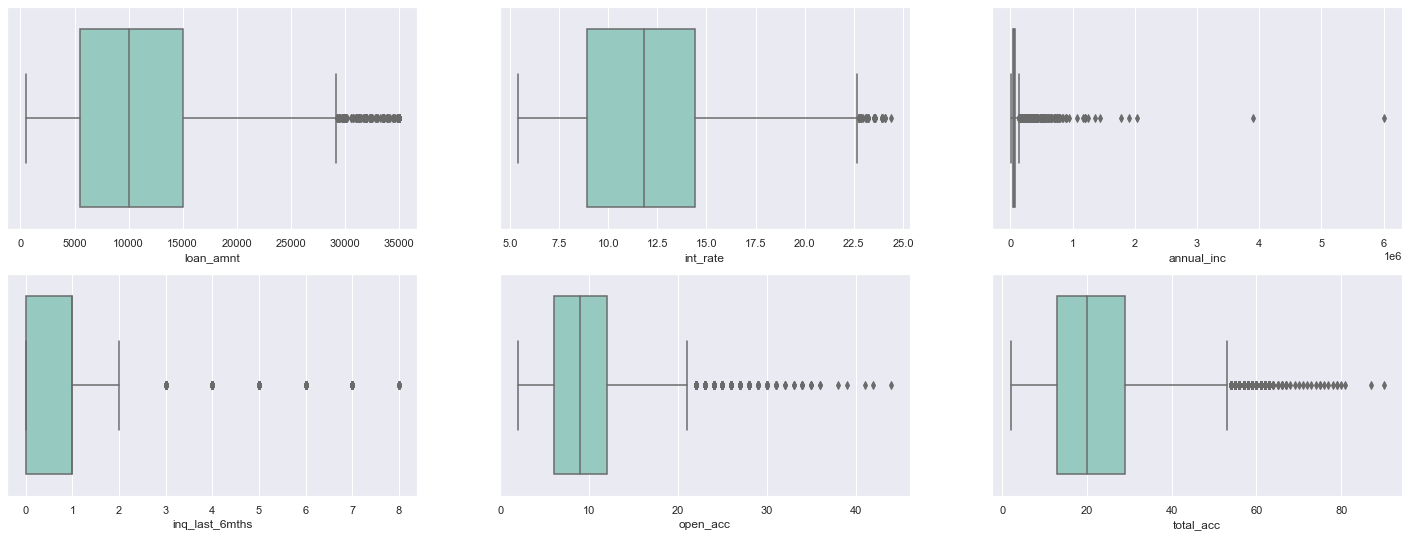

In [38]:
# Compare these columns with their Boxplots

sns.set(rc={'figure.figsize':(25,9)})

fig, axes = plt.subplots(2, 3)
axes = axes.flatten()

sns.set_style("darkgrid")

ax = sns.boxplot(x=loan["loan_amnt"], ax=axes[0], palette="Set3")
ax = sns.boxplot(x=loan["int_rate"], ax=axes[1], palette="Set3")
ax = sns.boxplot(x=loan["annual_inc"], ax=axes[2], palette="Set3")
ax = sns.boxplot(x=loan["inq_last_6mths"], ax=axes[3], palette="Set3")
ax = sns.boxplot(x=loan["open_acc"], ax=axes[4], palette="Set3")
ax = sns.boxplot(x=loan["total_acc"], ax=axes[5], palette="Set3")

# Show the plot.
plt.show()


### Observation:
    
#### We confirm that the columns: 'loan_amnt', 'int_rate', 'annual_inc', 'inq_last_6mths', 'open_acc', 'total_acc'.

#### Have a huge amount of outliers.

In [39]:
# Check the shape.

loan.shape

(37497, 16)

### We need a custom function to remove outliers. 
#### Let's define one. 

In [40]:
# Method definition to remove outliers. This uses z-scores. Any value above +/- 3 std dev are outliers and hence we remove them.

def remove_outliers(df, col):
    
    # Remove outliers from the column
    
    return df[np.abs(stats.zscore(df[col])) < 3]
    
    

In [41]:
# Remove outlier from columns: 
# 'loan_amnt', 'int_rate', 'annual_inc', 'inq_last_6mths', 'open_acc', 'total_acc'


loan = remove_outliers(loan, 'loan_amnt')
loan = remove_outliers(loan, 'int_rate')
loan = remove_outliers(loan, 'annual_inc')
loan = remove_outliers(loan, 'inq_last_6mths')
loan = remove_outliers(loan, 'open_acc')
loan = remove_outliers(loan, 'total_acc')

# Check the new shape.

loan.shape

(35714, 16)

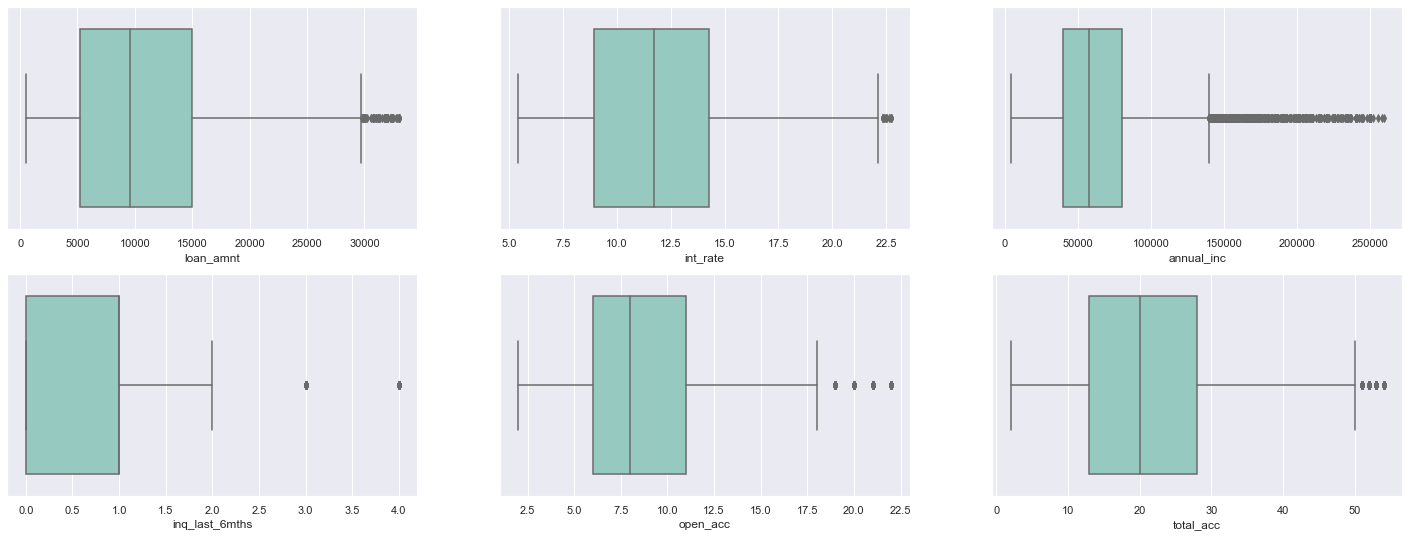

In [42]:
# Chart Boxplots post Outlier Treatment for comparizon

sns.set(rc={'figure.figsize':(25,9)})

fig, axes = plt.subplots(2, 3)
axes = axes.flatten()

sns.set_style("darkgrid")

ax = sns.boxplot(x=loan["loan_amnt"], ax=axes[0], palette="Set3")
ax = sns.boxplot(x=loan["int_rate"], ax=axes[1], palette="Set3")
ax = sns.boxplot(x=loan["annual_inc"], ax=axes[2], palette="Set3")
ax = sns.boxplot(x=loan["inq_last_6mths"], ax=axes[3], palette="Set3")
ax = sns.boxplot(x=loan["open_acc"], ax=axes[4], palette="Set3")
ax = sns.boxplot(x=loan["total_acc"], ax=axes[5], palette="Set3")

# Show the plot.
plt.show()


### Observation:
    
#### Post the outlier treatment, the outliers in the mentioned columns have been drastically reduced.
#### We can replace the outliers with the max or upper fence, but that wont impact our analysis.
#### Hence we can conclude the outler treatment now.

In [43]:
# Check/sample the loan dataframe.


loan.sample(10)

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,inq_last_6mths,open_acc,revol_util,total_acc
23530,16500,60,9.25,B,B2,5,MORTGAGE,90189.96,Verified,0,home_improvement,10.78,1,14,22.7,34
32083,14000,36,14.59,D,D1,9,RENT,73000.00,Not Verified,0,debt_consolidation,12.13,0,7,70.8,32
16617,5000,36,5.42,A,A1,10,MORTGAGE,31000.00,Not Verified,0,debt_consolidation,16.03,3,12,17.4,50
21887,14500,60,9.99,B,B4,0,RENT,38400.00,Source Verified,0,debt_consolidation,15.44,1,7,71.7,18
16790,1000,36,11.11,B,B5,3,OWN,16800.00,Not Verified,0,car,4.71,1,14,88.5,24
37016,11000,36,13.47,C,C4,1,MORTGAGE,24000.00,Not Verified,0,other,13.65,0,7,42.2,8
9606,2000,36,15.99,D,D2,4,RENT,9600.00,Not Verified,0,debt_consolidation,15.63,3,6,57.6,6
35922,14500,36,13.16,C,C3,0,RENT,45000.00,Source Verified,0,debt_consolidation,24.91,0,10,74.6,11
31894,13750,36,11.36,B,B5,0,RENT,42000.00,Not Verified,0,debt_consolidation,24.74,0,8,34.1,48
20604,20000,36,14.54,D,D1,4,MORTGAGE,114996.00,Verified,0,debt_consolidation,13.89,0,8,74.0,24


## Derived Metrics

#### We need to create bins for continuous factors.
#### The continuous factors are: loan_amnt_bin, int_rate, annual_inc, dti, revol_util


In [44]:
# Get the min and max for loan_amnt

np.min(loan.loan_amnt),np.max(loan.loan_amnt)

(500, 33000)

In [45]:
# Bins for loan_amnt_bin

loan['loan_amnt_bin'] =  np.where(loan['loan_amnt']>=28000,'LA5:28000+',
                                              np.where(loan['loan_amnt']>=21000,'LA4:21000-28000',
                                                  np.where(loan['loan_amnt']>=14000,'LA3:14000-21000',
                                                      np.where(loan['loan_amnt']>=7000,'LA2:7000-14000',
                                                          'LA1:0-7000'))))

In [46]:
# Get the min and max for int_rate

np.min(loan.int_rate),np.max(loan.int_rate)

(5.42, 22.74)

In [47]:
# Bins for int_rate_bin

loan['int_rate_bin'] = np.where(loan['int_rate']>=22.00,'IR5:22.00+',
                                              np.where(loan['int_rate']>=16.50,'IR4:16.50-22.00',
                                                  np.where(loan['int_rate']>=11.00,'IR3:11.00-16.50',
                                                      np.where(loan['int_rate']>=5.50,'IR2:5.50-11.00',
                                                          'IR1:0-5.50'))))

In [48]:
# Get the min and max for annual_inc

np.min(loan.annual_inc),np.max(loan.annual_inc)

(4000.0, 259000.0)

In [49]:
# Bins for annual_inc_bin

loan['annual_inc_bin'] = np.where(loan['annual_inc']>=200000.0,'AI5:200000.0+',
                                              np.where(loan['annual_inc']>=150000.0,'AI4:150000.0-200000.0',
                                                  np.where(loan['annual_inc']>=100000.0,'AI3:100000.0-150000.0',
                                                      np.where(loan['annual_inc']>=50000.0,'AI2:50000.0-100000.0',
                                                          'AI1:0-50000'))))

In [50]:
# Get the min and max for revol_util

np.min(loan.revol_util),np.max(loan.revol_util)

(0.0, 99.9)

In [51]:
# Bins for revol_util_bin

loan['revol_util_bin'] = np.where(loan['revol_util']>=80.0,'RU5:80.0+',
                                              np.where(loan['revol_util']>=60.0,'RU4:60.0-80.0',
                                                  np.where(loan['revol_util']>=40.0,'RU3:40.0-60.0',
                                                      np.where(loan['revol_util']>=20.0,'RU2:20.0-40.0',
                                                          'RU1:0-20.0'))))

In [52]:
# Get the min and max for dti

np.min(loan.dti),np.max(loan.dti)

(0.0, 29.99)

In [53]:
# Bins for dti_bin

loan['dti_bin'] = np.where(loan['dti']>=20.00,'DT5:20.00+',
                                              np.where(loan['dti']>=15.00,'DT4:15.00-20.00',
                                                  np.where(loan['dti']>=10.00,'DT3:10.00-15.00',
                                                      np.where(loan['dti']>=5.00,'DT2:5.00-10.00',
                                                          'DT1:0-5.00'))))

## Data Analysis

### Univariate Analysis

#### Target Variable (loan_status) Count Plot

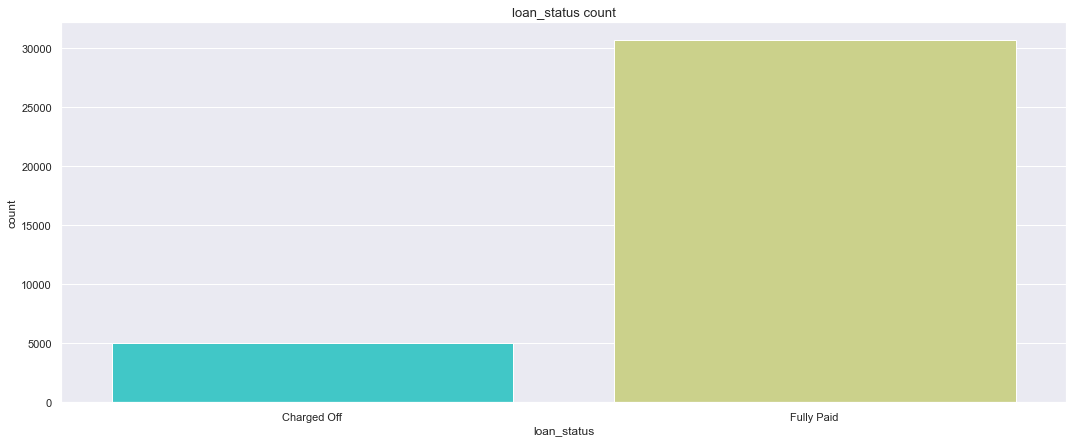

In [54]:
# Categorical Loan Status

# plot figure with size.
plt.figure(figsize=(18,7))

# Seaborn style.
sns.set_style("darkgrid")

# Seaborn barplot.
ax = sns.countplot(
                    x='loan_status',
                    data=loan, 
                    order=[1,0],
                    palette = 'rainbow'    
                  )
# Font scale.
sns.set(font_scale=1.1)

# Axes Labels.
ax.set(xlabel='loan_status', ylabel='count')

# Chart Title.
ax.set_title("loan_status count")

ax.set_xticklabels(['Charged Off', 'Fully Paid'])

# Show the plot.
plt.show()

## Univariate Segmented Analysis

### Method for chart creation

In [55]:
# Method definition for univariate segmented analysis.

def univariate_segmented_analysis(x,y, angle):
    
    # plot figure with size.
    plt.figure(figsize=(18,7))

    # Seaborn style.
    sns.set_style("darkgrid")    
    
    # Seaborn barplot.
    ax = sns.barplot(data = loan,
            x = x,
            y = y,
            ci= None, 
            palette = 'rainbow',
            estimator=lambda x: sum(x==1)*100.0/len(x),
            order=np.sort(loan[x].unique())
                     
    )

    # Font scale.
    sns.set(font_scale=1.2)

    # Axes Labels.
    ax.set(xlabel=x, ylabel='loan defaulter percentage')

    # Plot Title.
    ax.set_title("loan defaulter percentage with respect to " + x)
    
    # Y axis percentage format.
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    # X axis tick rotation angle.
    ax.set_xticklabels(ax.get_xticklabels(), rotation=angle, horizontalalignment='center')

    # Show the plot.
    plt.show()
    
    return 
    
    

## Univariate Segment Analysis for Original Data.

#### We first Perform Univariate Segmented Analysis for Original Data i.e. Factors which were not derived.

#### term, grade, sub_grade, emp_length, home_ownership, verification_status, purpose, inq_last_6mths, open_acc, total_acc.

## Analyze for loan defaulters percentage with respect to term.

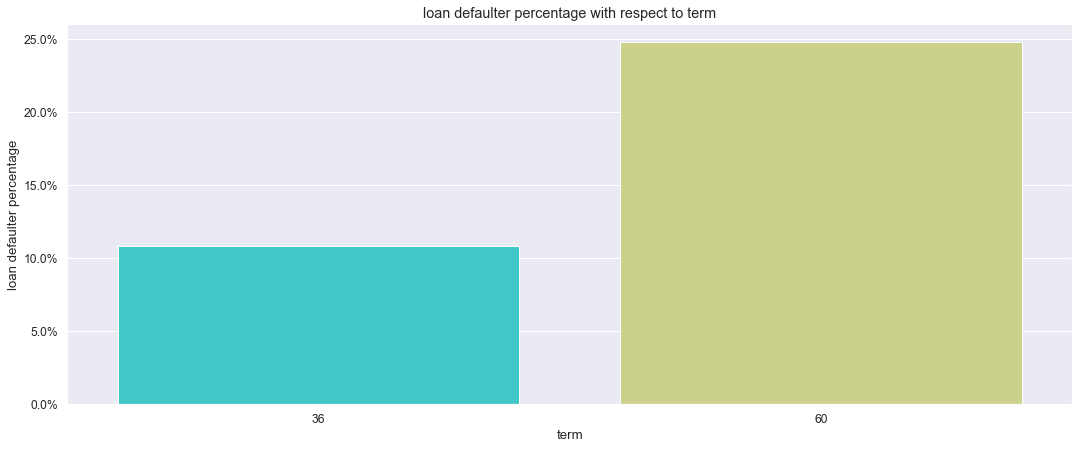

In [56]:
# Bar plot for loan defaulter percentage with respect to term

univariate_segmented_analysis('term', 'loan_status', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend as the term moves from 36 to 60.

### Inference: term is a driving factor.


## Analyze for loan defaulters percentage with respect to grade.

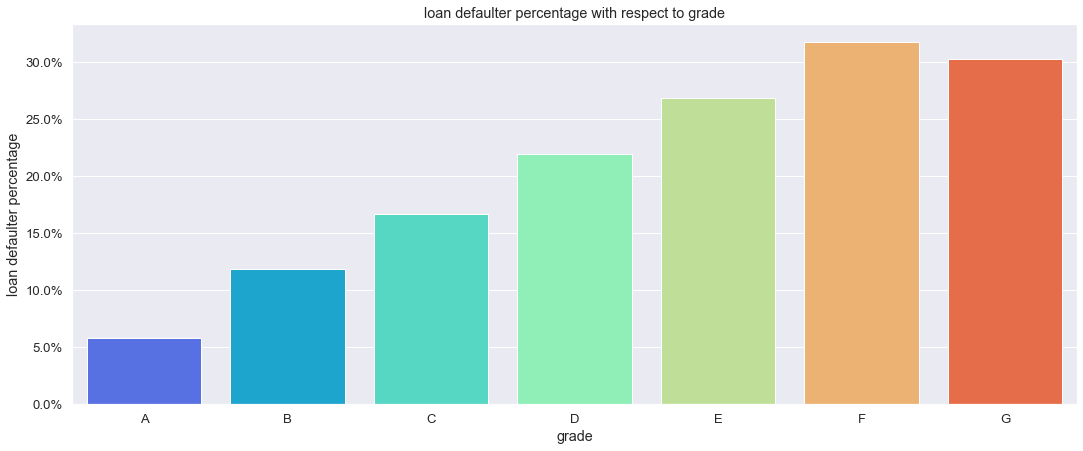

In [57]:
# Bar plot for loan defaulter percentage with respect to grade

univariate_segmented_analysis('grade', 'loan_status', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend  as the grade moves from A to G.

### Inference: grade is a driving factor.

## Analyze for loan defaulters percentage with respect to sub_grade.

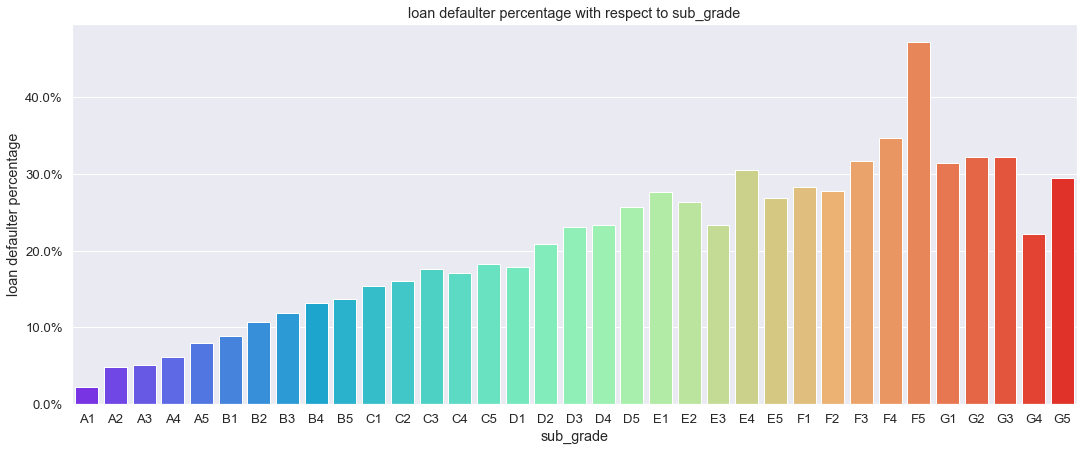

In [58]:
# Bar plot for loan defaulter percentage with respect to sub_grade

univariate_segmented_analysis('sub_grade', 'loan_status', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend as the sub_grade moves from A1 to G5.

### Inference: sub_grade is a driving factor.

## Analyze for loan defaulters percentage with respect to emp_length.

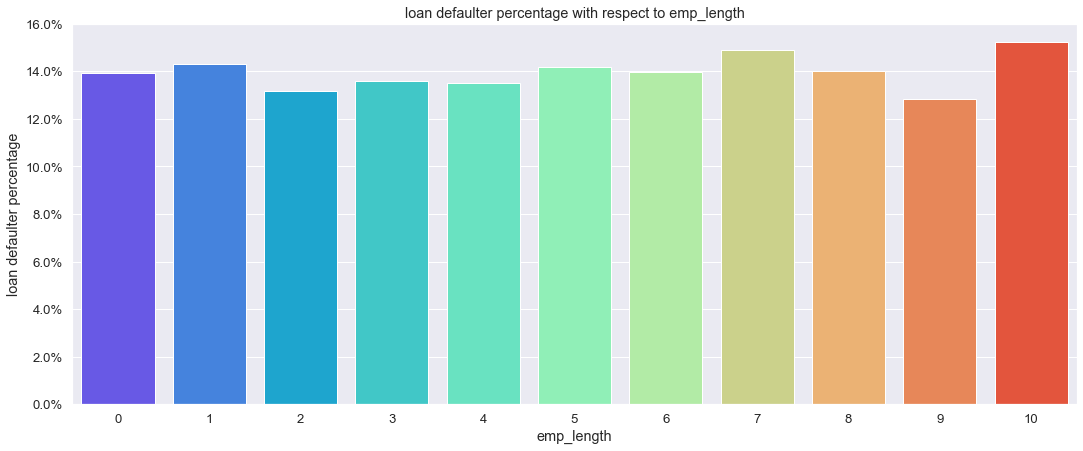

In [59]:
# Bar plot for loan defaulter percentage with respect to emp_length

univariate_segmented_analysis('emp_length', 'loan_status', 0)

### Observation:
    
#### loan defaulter percentage displays no particular trend as the emp_length moves from 0 to 10.

### Inference: emp_length is not a driving factor.

## Analyze for loan defaulters percentage with respect to home_ownership.

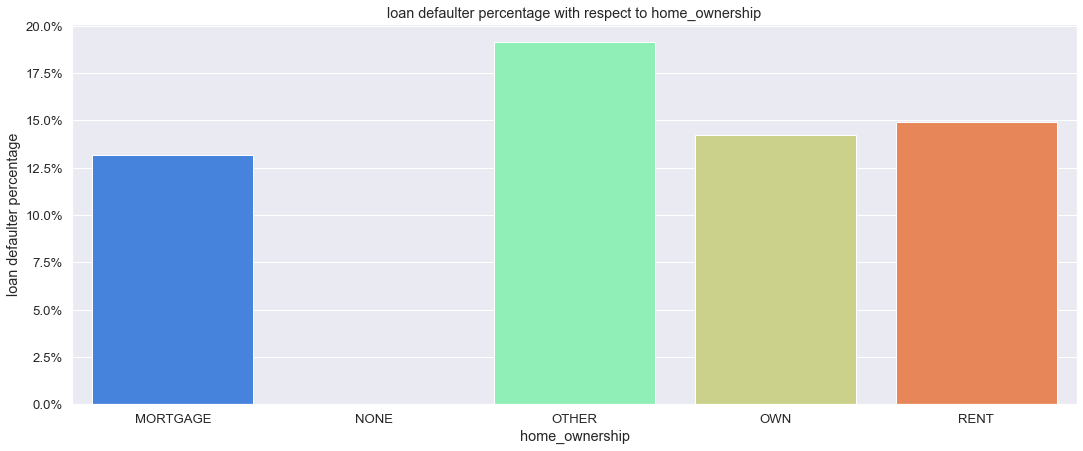

In [60]:
# Bar plot for loan defaulter percentage with respect to home_ownership

univariate_segmented_analysis('home_ownership', 'loan_status', 0)

### Observation:
    
#### loan defaulter percentage displays no particular trend as the home_ownership moves from MORTGAGE to RENT.
#### The defaulter rate seems to be high for Other category, however the rise from next highest is just 5%.

### Inference: home_ownership is not a driving factor.

## Analyze for loan defaulters percentage with respect to verification_status.

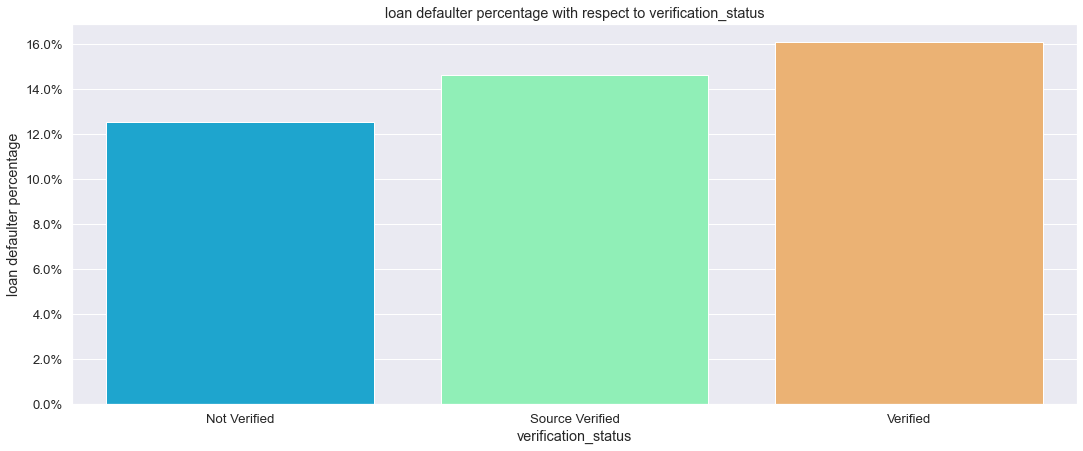

In [61]:
# Bar plot for loan defaulter percentage with respect to verification_status

univariate_segmented_analysis('verification_status', 'loan_status', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend as the verification_status moves from Not Verified to Verified.

### Inference: Check whether Verification process is stable and mature or needs improvements. 

## Analyze for loan defaulters percentage with respect to purpose.

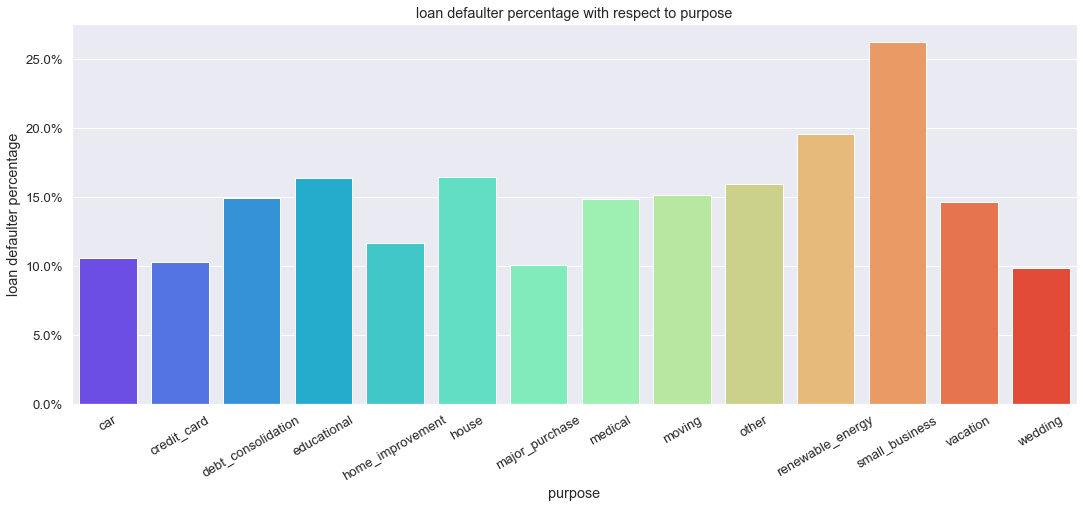

In [62]:
# Bar plot for loan defaulter percentage with respect to purpose

univariate_segmented_analysis('purpose','loan_status', 30)

### Observation:
    
#### loan defaulter percentage displays no particular trend with purpose.
#### However the defaulter rate seems to be much high for small_business. 
#### Whereas wedding, major purchase, have much smaller defaulter rate.

### Inference from the analysis: purpose is a driving factor.

## Analyze for loan defaulters percentage with respect to inq_last_6mths.

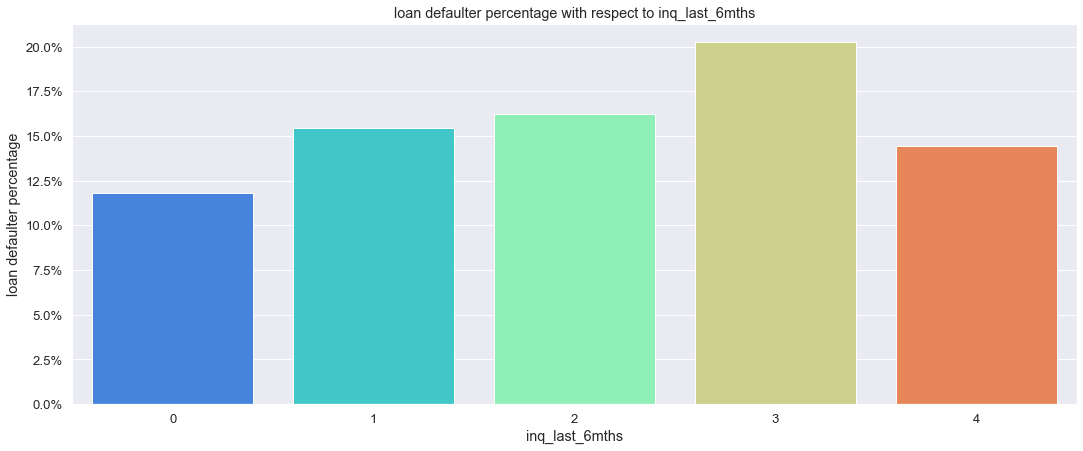

In [63]:
# Bar plot for loan defaulter percentage with respect to inq_last_6mths

univariate_segmented_analysis('inq_last_6mths','loan_status', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend as the inq_last_6mths moves from 0 to 4.

### Inference: inq_last_6mths is a driving factor.

## Analyze for loan defaulters percentage with respect to open_acc.

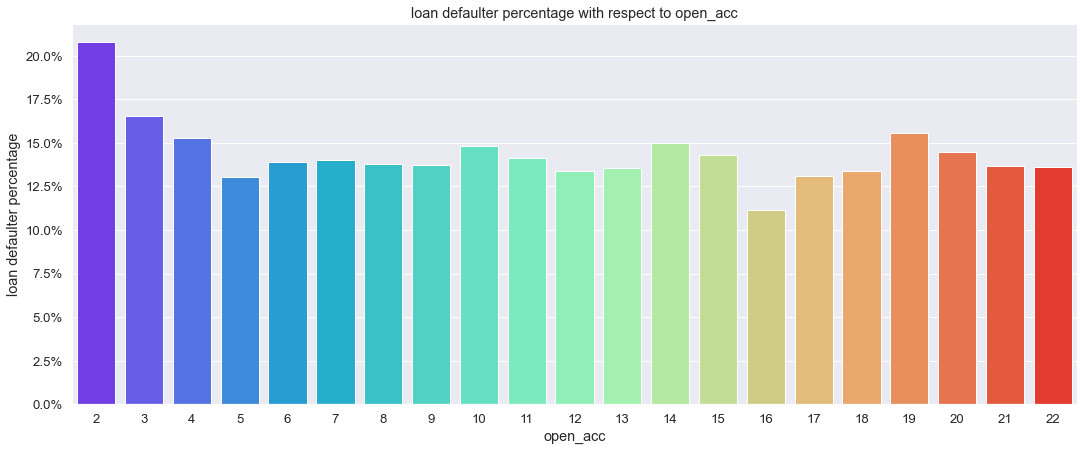

In [64]:
# Bar plot for loan defaulter percentage with respect to open_acc

univariate_segmented_analysis('open_acc','loan_status', 0)

### Observation:
    
#### loan defaulter percentage displays no particular trend as the open_acc moves from 2 to 22.

### Inference: open_acc is not a driving factor.

## Analyze for loan defaulters percentage with respect to total_acc.

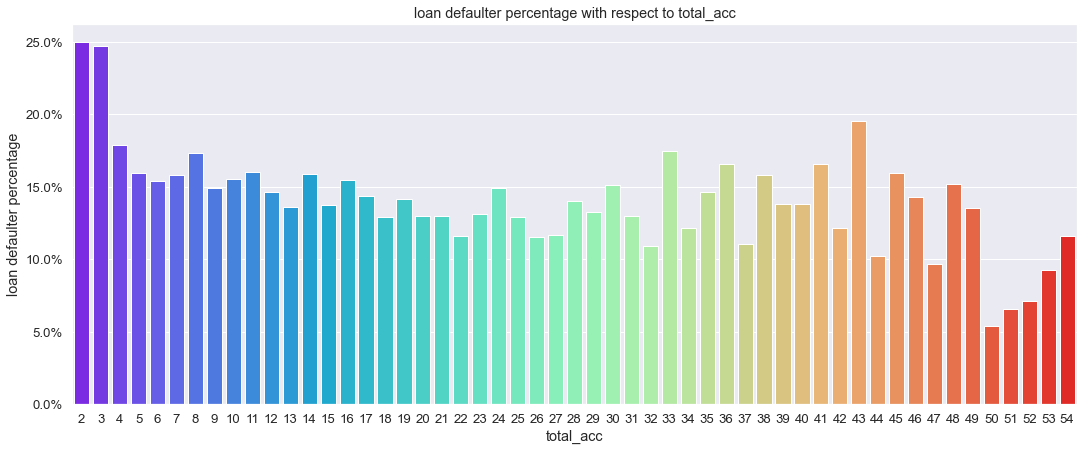

In [65]:
# Bar plot for loan defaulter percentage with respect to total_acc

univariate_segmented_analysis('total_acc','loan_status', 0)

### Observation:
    
#### loan defaulter percentage displays no particular trend as the total_acc moves from 2 to 54.

### Inference from the analysis: total_acc is not a driving factor.

## Identified driving factors in the original data: 
### term, grade, sub grade, purpose, and inq_last_6mths.

## Univariate Segment Analysis for Derived Metrics.

#### We next Perform Univariate Segmented Analysis for Derived Metrics.

#### loan_amnt_bin, int_rate_bin, annual_inc_bin, revol_util_bin, dti_bin.

## Analyze for loan defaulters percentage with respect to loan_amnt_bin (loan_amnt).

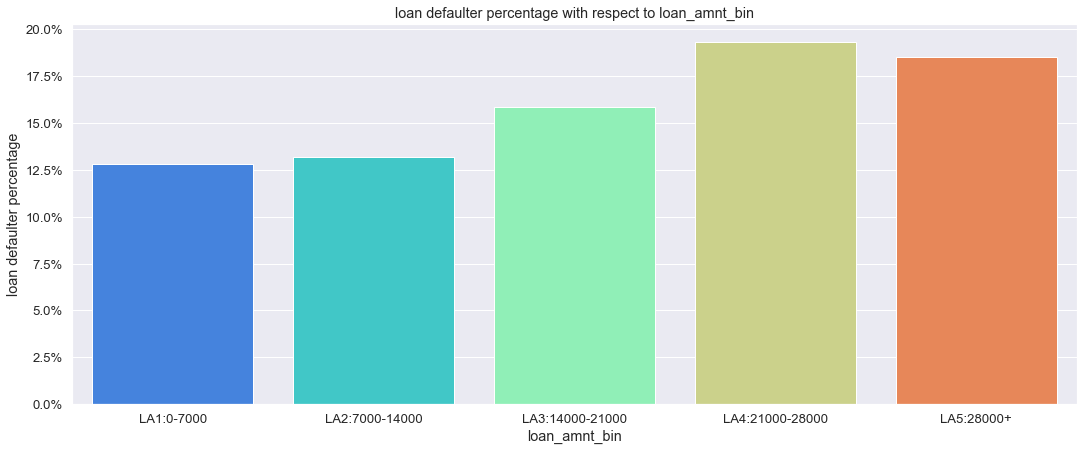

In [66]:
# Bar plot for loan defaulter percentage with respect to loan_amnt_bin

univariate_segmented_analysis('loan_amnt_bin','loan_status', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend as the loan_amnt_bin moves from 0-7000 to 28000+.

### Inference: loan_amnt is a driving factor.

## Analyze for loan defaulters percentage with respect to int_rate_bin (int_rate).

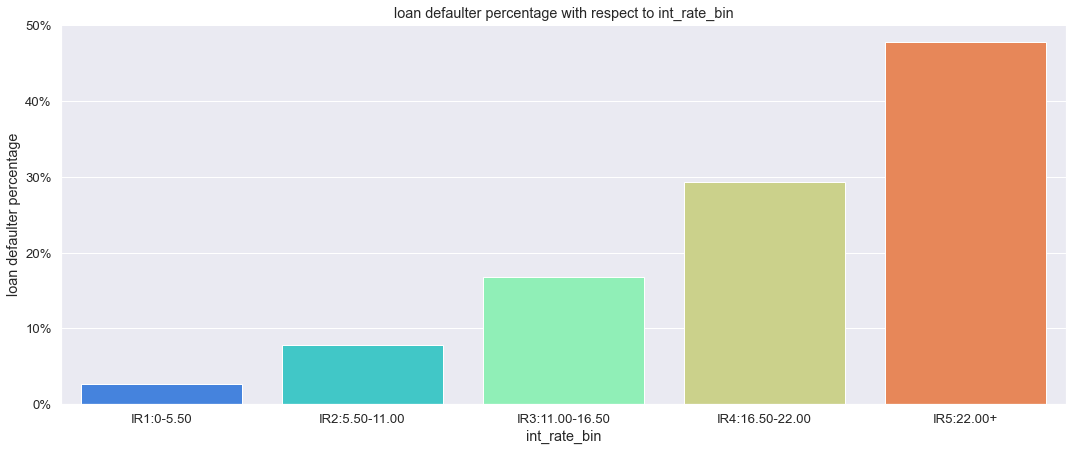

In [67]:
# Bar plot for loan defaulter percentage with respect to int_rate_bin

univariate_segmented_analysis('int_rate_bin','loan_status', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend as the int_rate_bin moves from 0-5.50 to 22.00+.

### Inference: int_rate is a driving factor.

## Analyze for loan defaulters percentage with respect to annual_inc_bin (annual_inc).

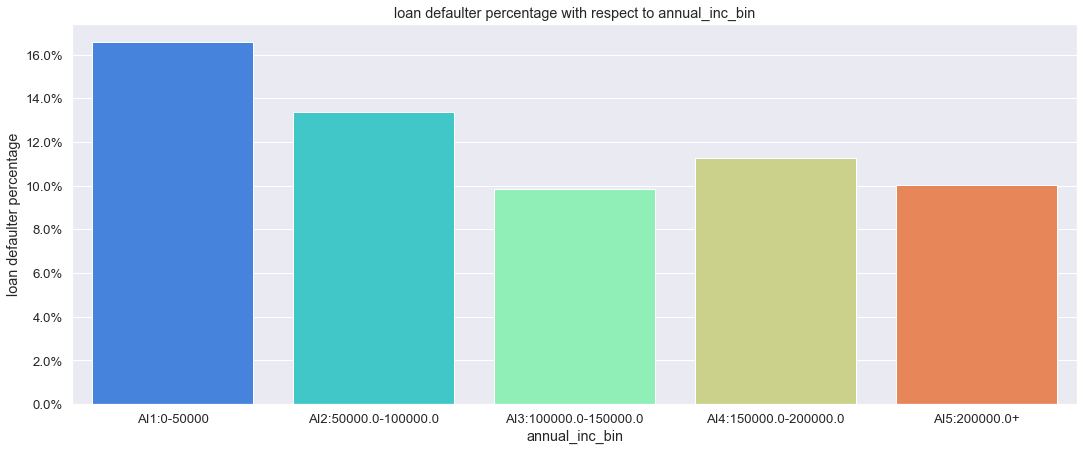

In [68]:
# Bar plot for loan defaulter percentage with respect to annual_inc_bin

univariate_segmented_analysis('annual_inc_bin','loan_status', 0)

### Observation:
    
#### loan defaulter percentage displays an decreasing as the annual_inc_bin moves from 0-50000 to 200000+.

### Inference: annual_inc is a driving factor.

## Analyze for loan defaulters percentage with respect to revol_util_bin (revol_util).

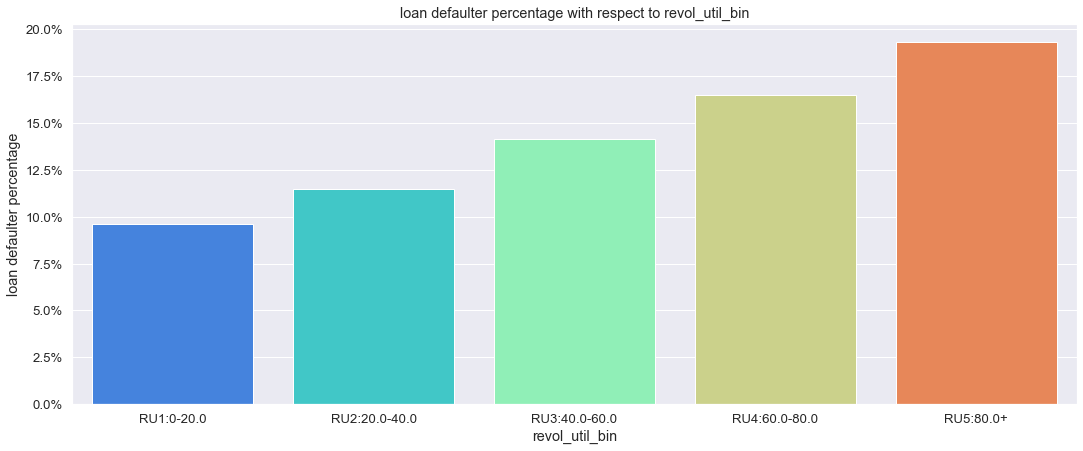

In [69]:
# Bar plot for loan defaulter percentage with respect to revol_util_bin

univariate_segmented_analysis('revol_util_bin','loan_status', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend as the revol_util_bin moves from 0-20.0 to 80.0+.

### Inference: revol_util is a driving factor.

## Analyze for loan defaulters percentage with respect to dti_bin (dti).

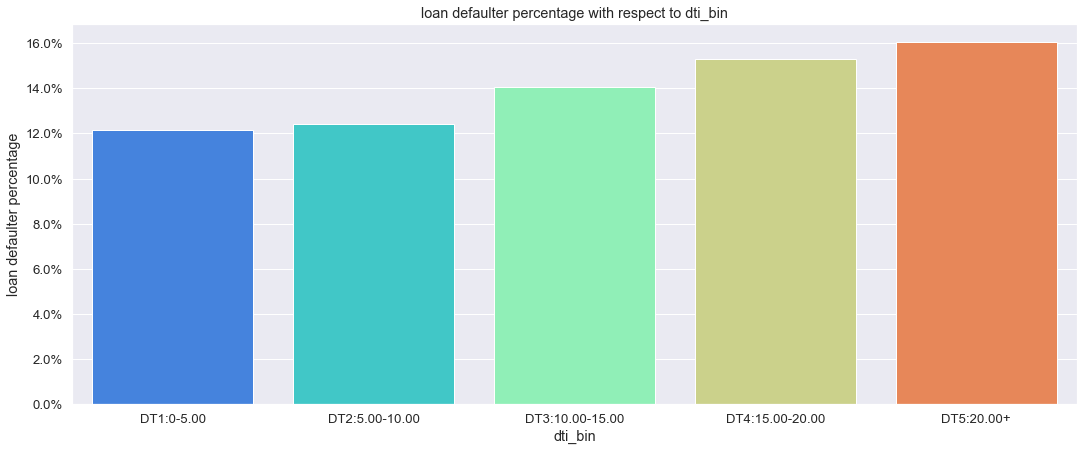

In [70]:
# Bar plot for loan defaulter percentage with respect to dti_bin

univariate_segmented_analysis('dti_bin','loan_status', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend as the dti_bin moves from 0-5.00 to 20.00+.

### Inference: dti is a driving factor.

### Identified driving factors using the derived data: loan_amnt, int_rate, annual_inc, revol_util, dti.

## Identified driving factors from the Univariate Analysis.
### Using Original Data: term, grade, sub grade, purpose, and inq_last_6mths.
### Using Derived Metrics: loan_amnt, int_rate, annual_inc, revol_util, dti.

## Bivariate Segmented Analysis

### Method for chart creation

In [71]:
# Method definition for bivariate analysis.

def bivariate_analysis(x, y, hue, angle):
    
    # plot figure with size.
    plt.figure(figsize=(18,12))
    
    # Seaborn style.    
    sns.set_style("darkgrid")
    
    # Seaborn barplot.
    ax = sns.barplot(data = loan,
            x = x,
            y = y,
            hue = hue,     
            ci= None, 
            palette = 'rainbow',
            estimator=lambda x: sum(x==1)*100.0/len(x),
            order=np.sort(loan[x].unique()),
            hue_order=np.sort(loan[hue].unique())
    )

    # Font scale.
    sns.set(font_scale=1.2)

    # Axes Labels.
    ax.set(xlabel=x, ylabel='loan defaulter percentage')

    # Plot Title.
    ax.set_title("loan defaulter percentage with respect to " + x + " and " + hue)
    
    # Plot legend position.
    plt.legend(bbox_to_anchor=(1, 1), loc=2)

    # Y axis percentage format.
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    # X axis tick rotation angle.
    ax.set_xticklabels(ax.get_xticklabels(), rotation=angle, horizontalalignment='center')

    # Show the plot.
    plt.show()

    return   

## Bivariate Segment Analysis for Original Data.

#### We first Perform Bivariate Segmented Analysis for Original Data i.e. Factors which were not derived.

#### term, grade, sub grade, purpose, and inq_last_6mths.

## Analyze for loan defaulters percentage with respect to term and grade.

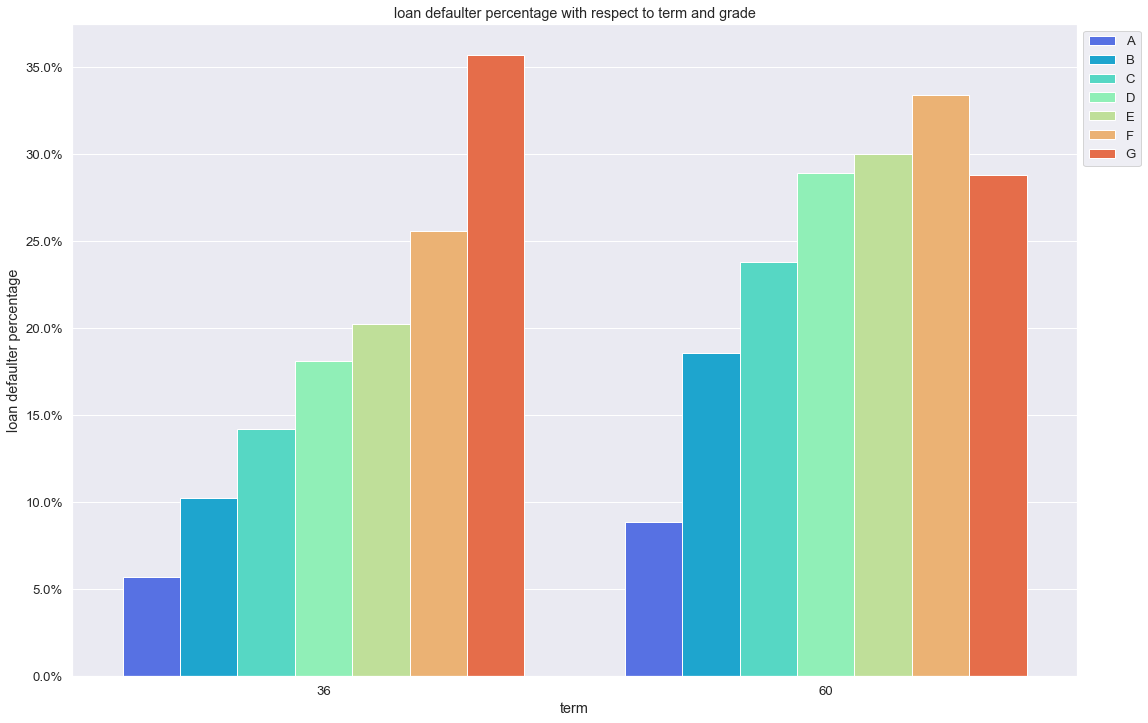

In [72]:
# Bar plot for loan defaulter percentage with respect to term and grade

bivariate_analysis('term','loan_status', 'grade', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend for every grade and term.

### Inference: term and grade together are driving factors.

## Analyze for loan defaulters percentage with respect to term and sub_grade.

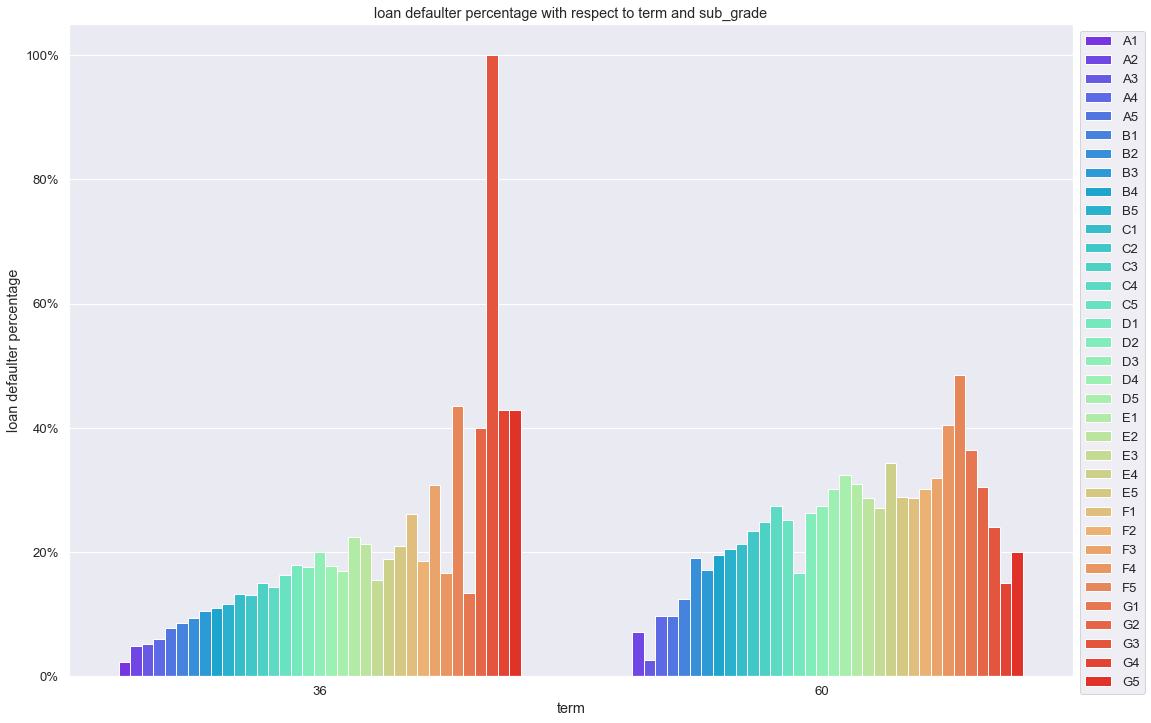

In [73]:
# Bar plot for loan defaulter percentage with respect to term and sub_grade

bivariate_analysis('term','loan_status', 'sub_grade', 0)

### Observation:

#### loan defaulting displays an increasing trend for every sub_grade and term.

### Inference: term and sub_grade  together are driving factors.

## Analyze for loan defaulters percentage with respect to term and purpose.

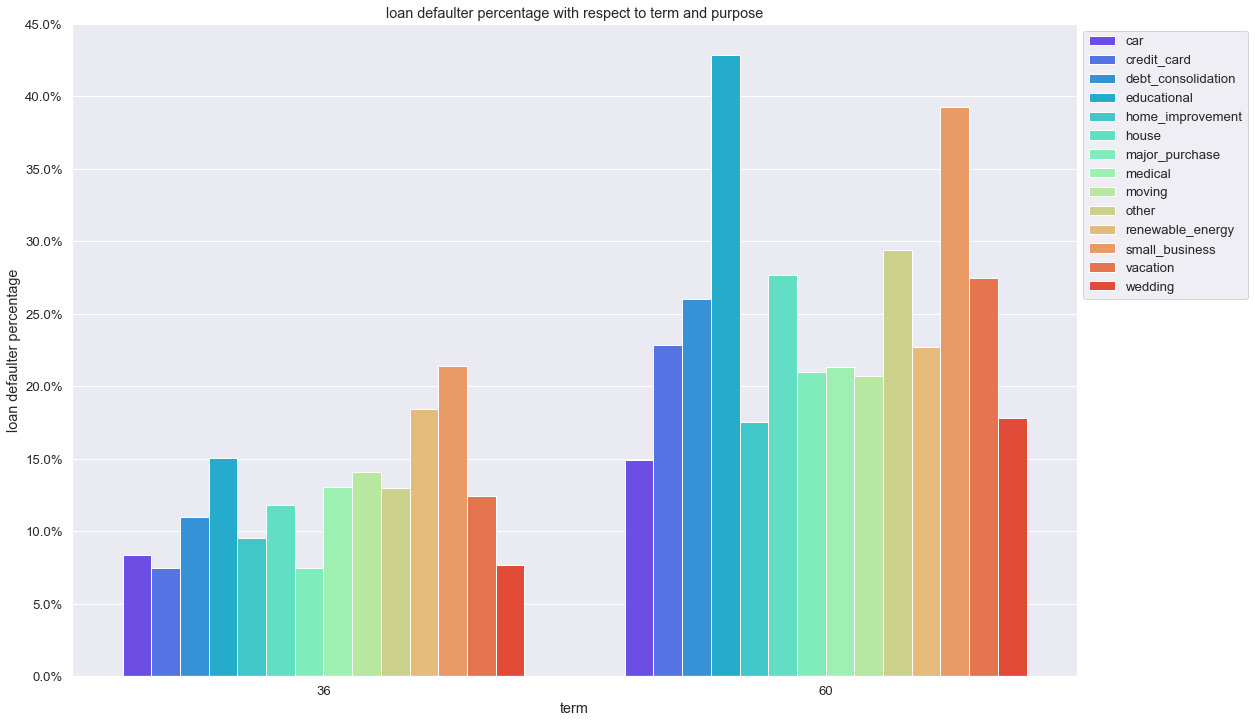

In [74]:
# Bar plot for loan defaulter percentage with respect to term and purpose

bivariate_analysis('term','loan_status', 'purpose', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend for every purpose and term.

### Inference: term and purpose together are driving factors.

## Analyze for loan defaulters percentage with respect to term and inq_last_6mths.

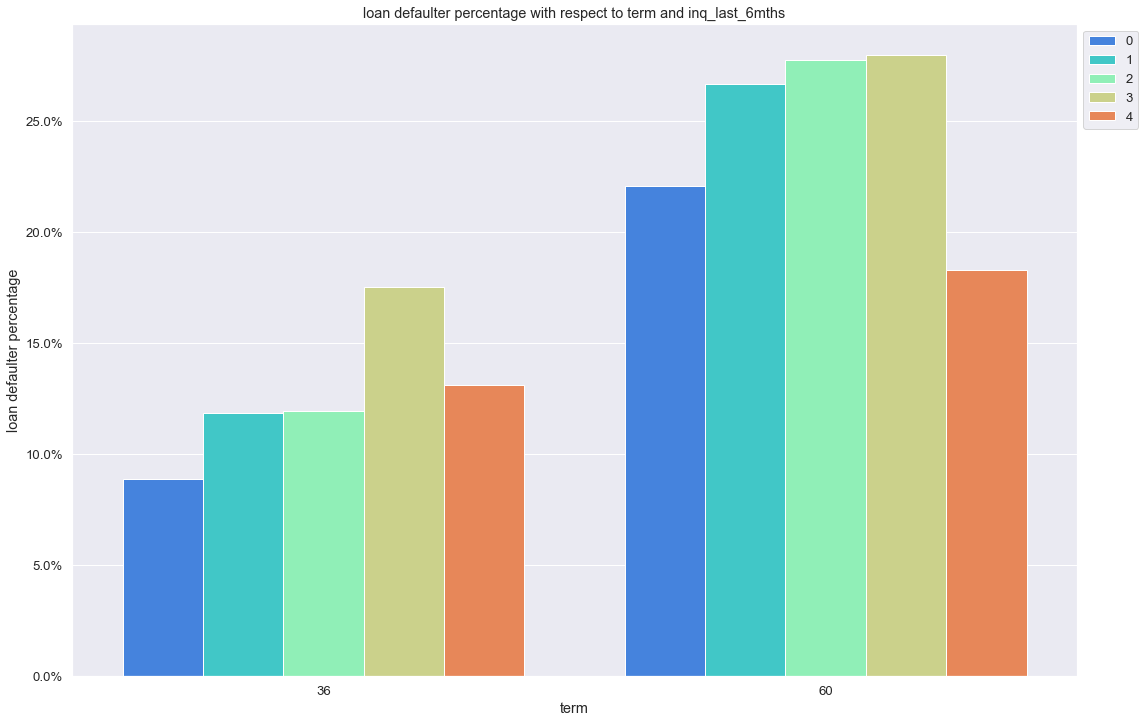

In [75]:
# Bar plot for loan defaulter percentage with respect to term and inq_last_6mths

bivariate_analysis('term','loan_status', 'inq_last_6mths', 0)

### Observation:
        
#### loan defaulter percentage displays an increasing trend for every inq_last_6mths and term.

### Inference: term and inq_last_6mths  together  are driving factors.

## Analyze for loan defaulters percentage with respect to grade and sub_grade.

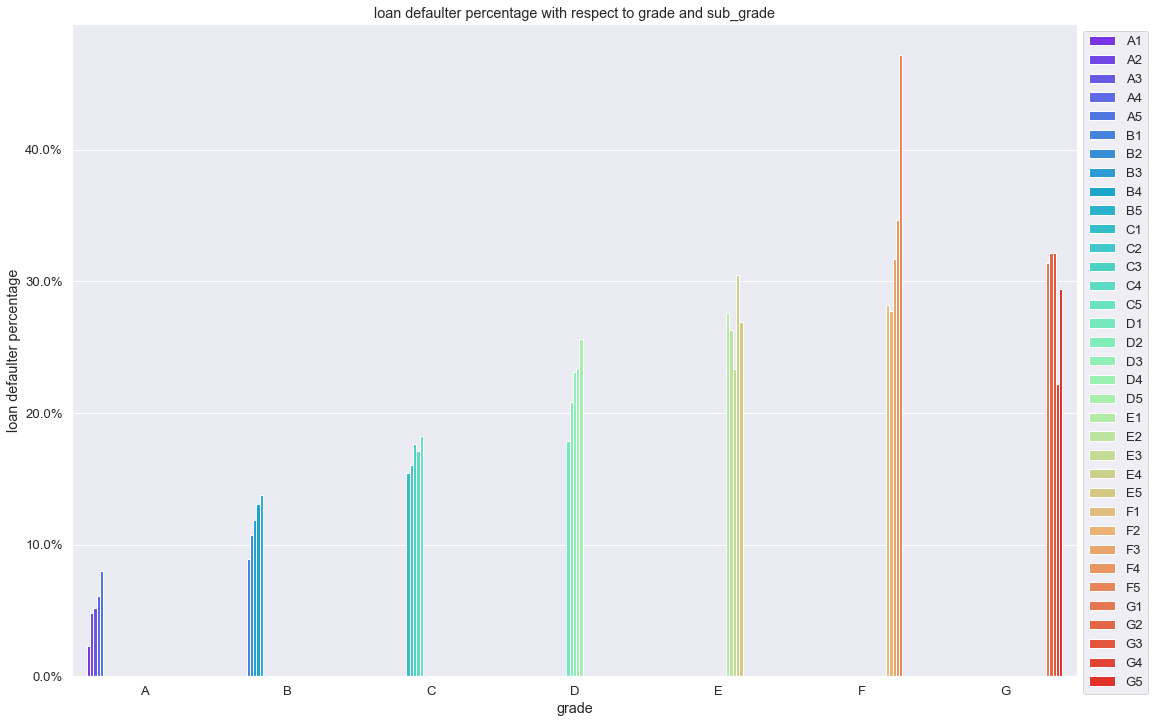

In [76]:
# Bar plot for loan defaulter percentage with respect to grade and sub_grade

bivariate_analysis('grade','loan_status', 'sub_grade', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend for every sub_grade and grade.

### Inference: grade and sub_grade  together are driving factors.

## Analyze for loan defaulters percentage with respect to grade and purpose.

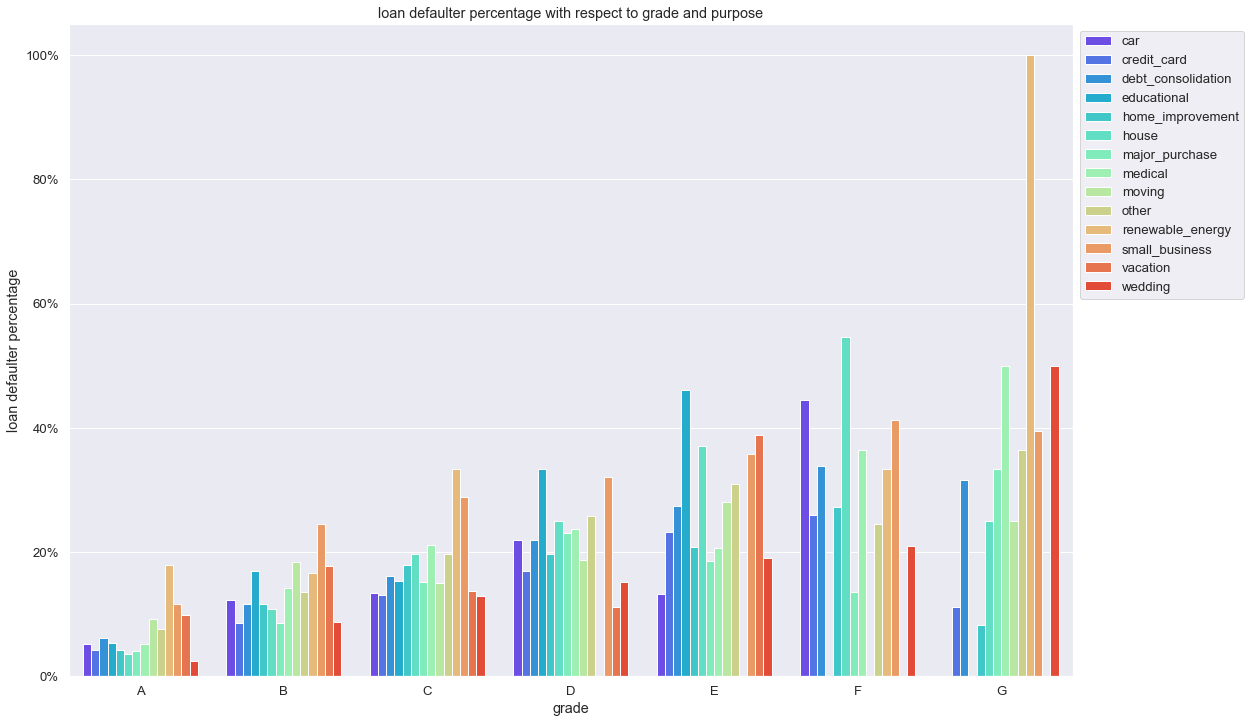

In [77]:
# Bar plot for loan defaulter percentage with respect to grade and purpose

bivariate_analysis('grade','loan_status', 'purpose', 0)

### Observation:

#### loan defaulter percentage displays an increasing trend for every purpose and grade. 

### Inference: grade and purpose  together are driving factors.

## Analyze for loan defaulters percentage with respect to grade and inq_last_6mths.

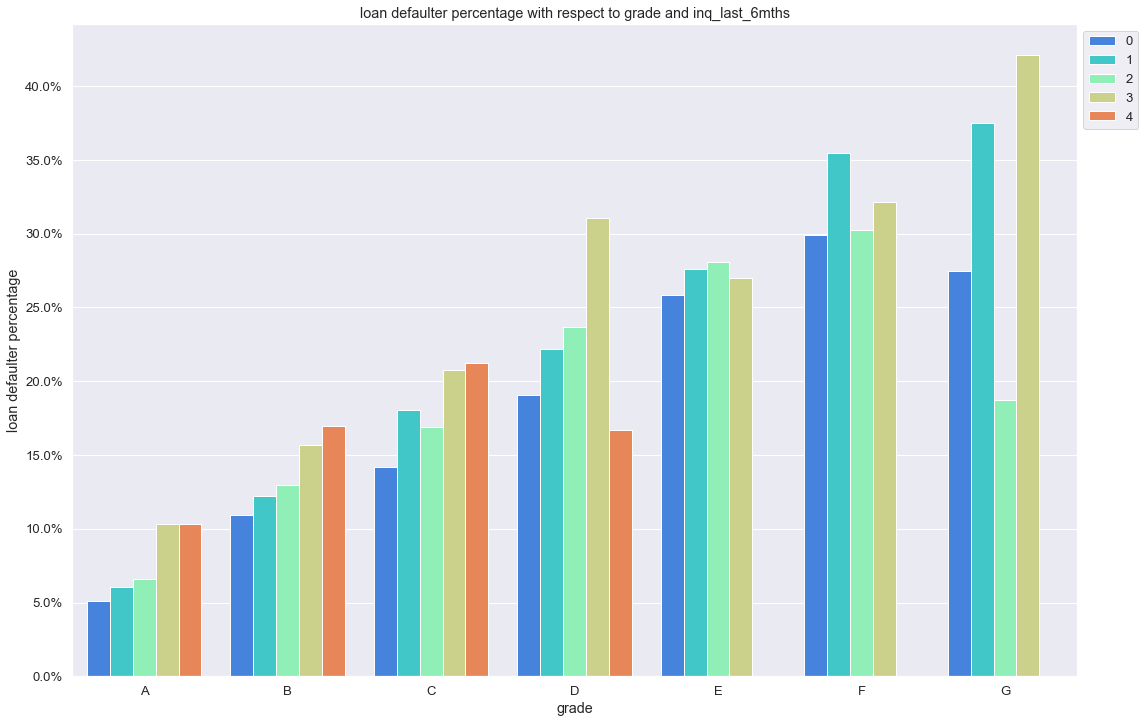

In [78]:
# Bar plot for loan defaulter percentage with respect to grade and inq_last_6mths

bivariate_analysis('grade','loan_status', 'inq_last_6mths', 0)

### Observation:

#### loan defaulter percentage displays an increasing trend for every inq_last_6mths and grade.

### Inference: grade and inq_last_6mths  together are driving factors.

## Analyze for loan defaulters percentage with respect to sub_grade and purpose.

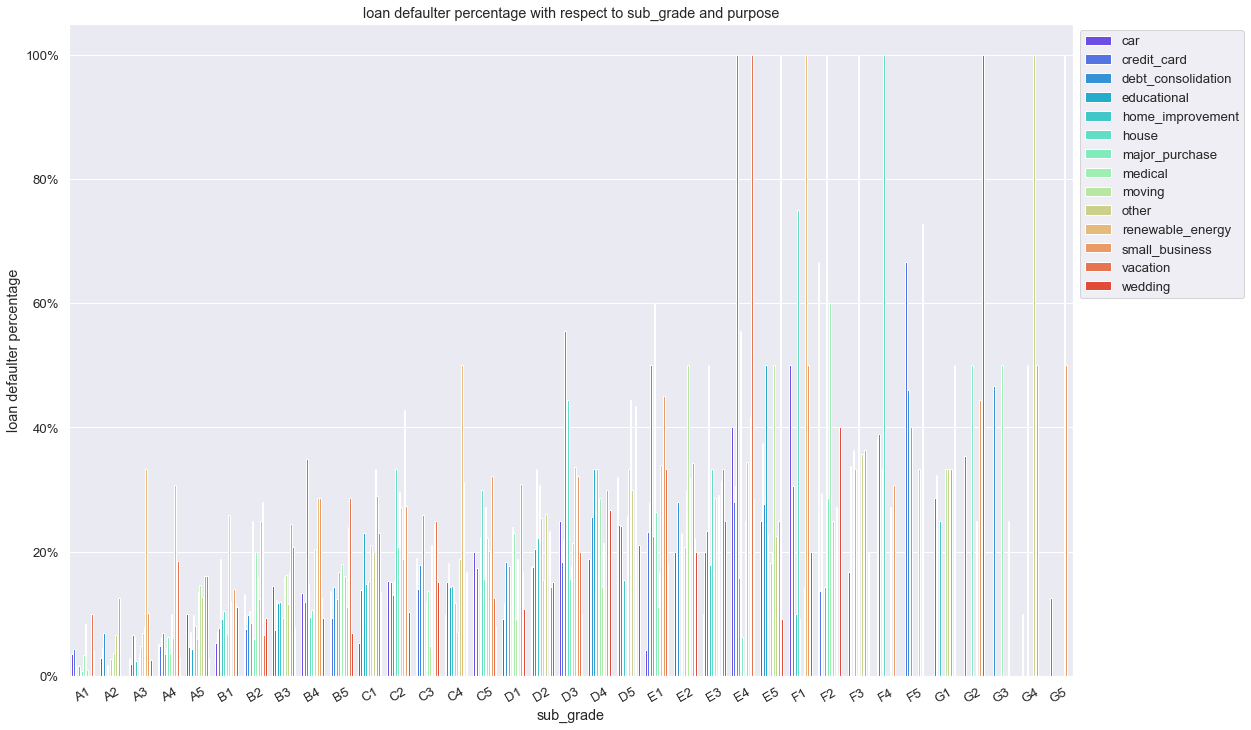

In [79]:
# Bar plot for loan defaulter percentage with respect to sub_grade and purpose

bivariate_analysis('sub_grade','loan_status', 'purpose', 30)

### Observation:

#### loan defaulter percentage displays an increasing trend for every purpose and sub_grade.

### Inference: sub_grade and purpose  together are driving factors.

## Analyze for loan defaulters percentage with respect to sub_grade and inq_last_6mths.

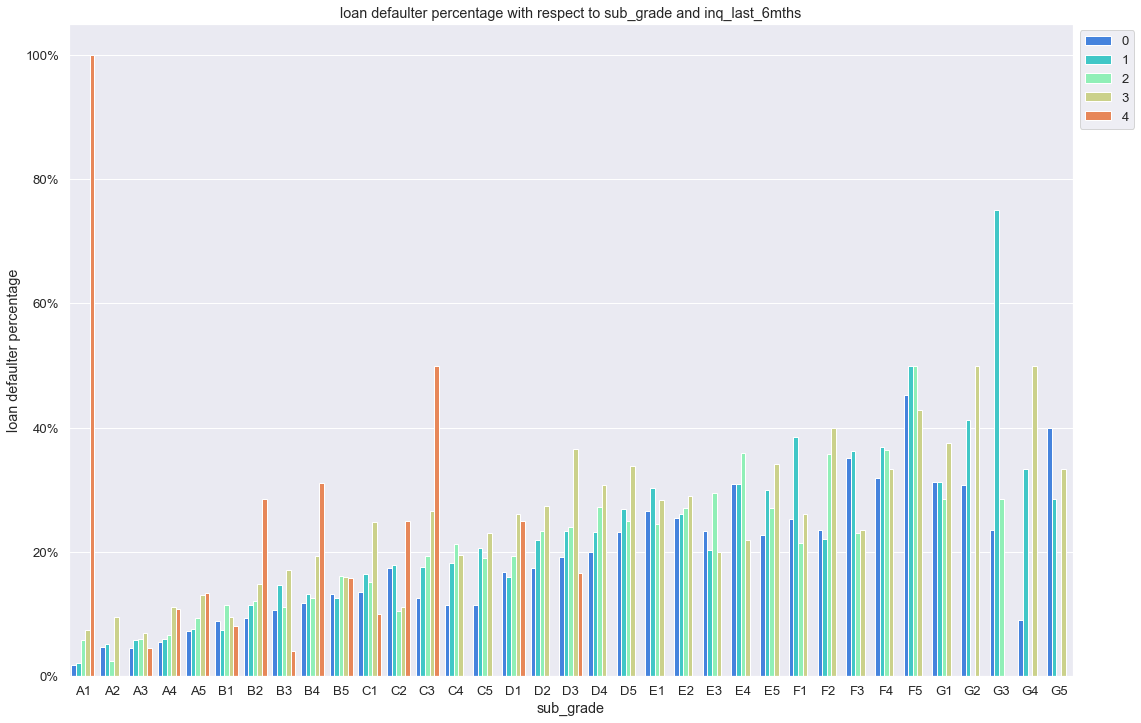

In [80]:
# Bar plot for loan defaulter percentage with respect to sub_grade and inq_last_6mths

bivariate_analysis('sub_grade','loan_status', 'inq_last_6mths', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend for every inq_last_6mths and sub_grade.

### Inference: sub_grade and inq_last_6mths together are driving factors.

## Analyze for loan defaulters percentage with respect to purpose and inq_last_6mths.

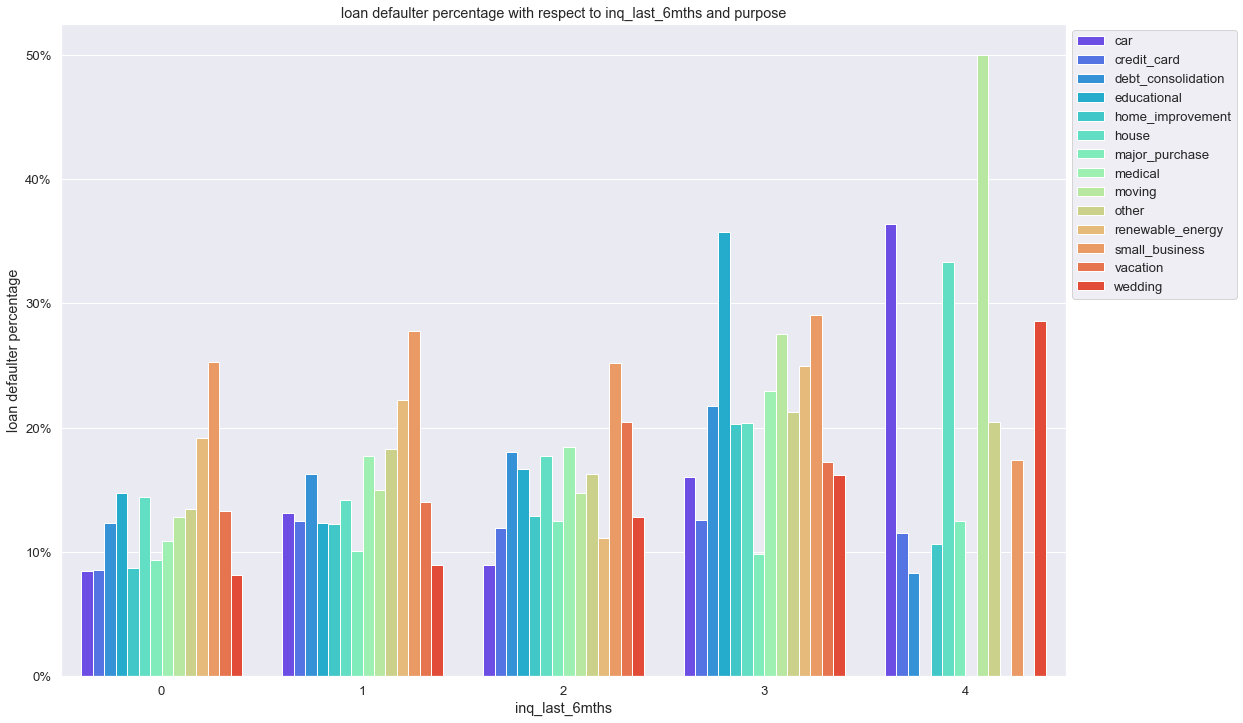

In [81]:
# Bar plot for loan defaulter percentage with respect to purpose and inq_last_6mths

bivariate_analysis('inq_last_6mths','loan_status', 'purpose', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend for every purpose and inq_last_6mths.

### Inference: inq_last_6mths and purpose together are driving factors.

## Identified driving factors in the original data:
### term, grade, sub grade, purpose, and inq_last_6mths.

## Bivariate Segment Analysis for Derived Metrics.

#### We next perform Bivariate Segmented Analysis for Derived Metrics i.e. Factors which were derived.

#### loan_amnt_bin, int_rate_bin, annual_inc_bin, revol_util_bin, dti_bin


## Analyze for loan defaulters percentage with respect to loan_amnt_bin and int_rate_bin.

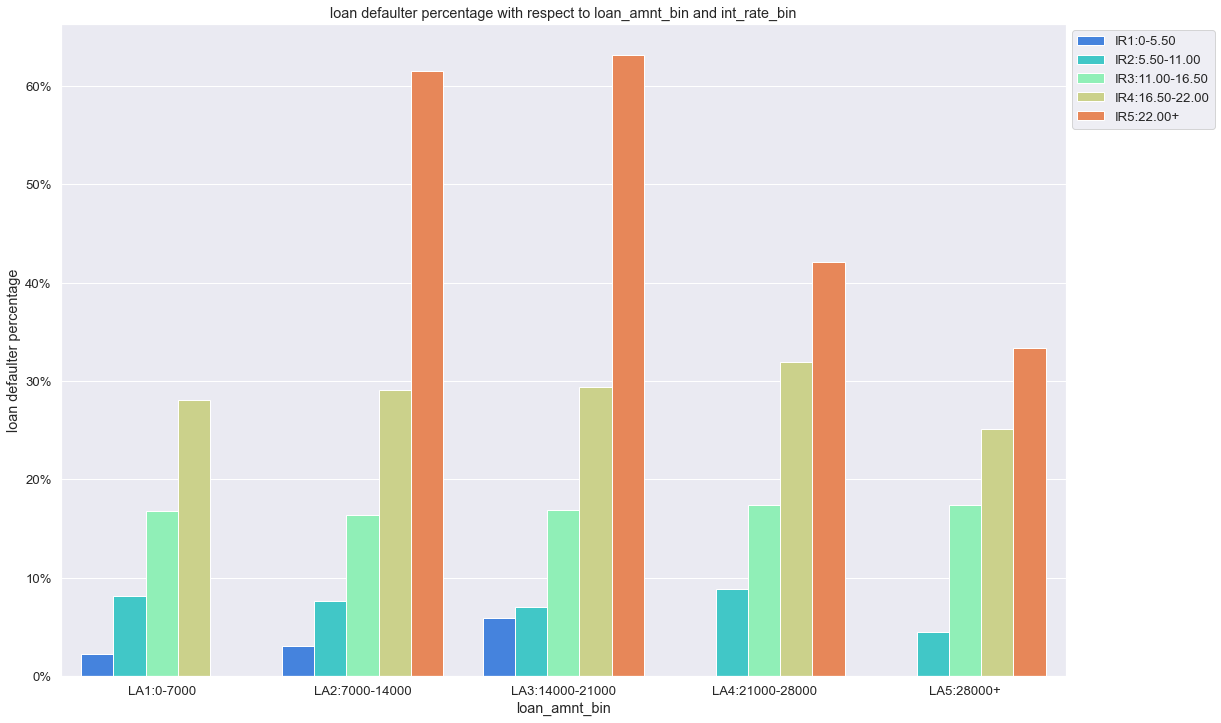

In [82]:
# Bar plot for loan defaulter percentage with respect to loan_amnt_bin(loan_amnt) and int_rate_bin(int_rate)

bivariate_analysis('loan_amnt_bin','loan_status', 'int_rate_bin', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend for every int_rate_bin(int_rate) and loan_amnt_bin(loan_amnt).

### Inference: loan_amnt and int_rate  together are driving factors.

## Analyze for loan defaulters percentage with respect to loan_amnt_bin and annual_inc_bin.

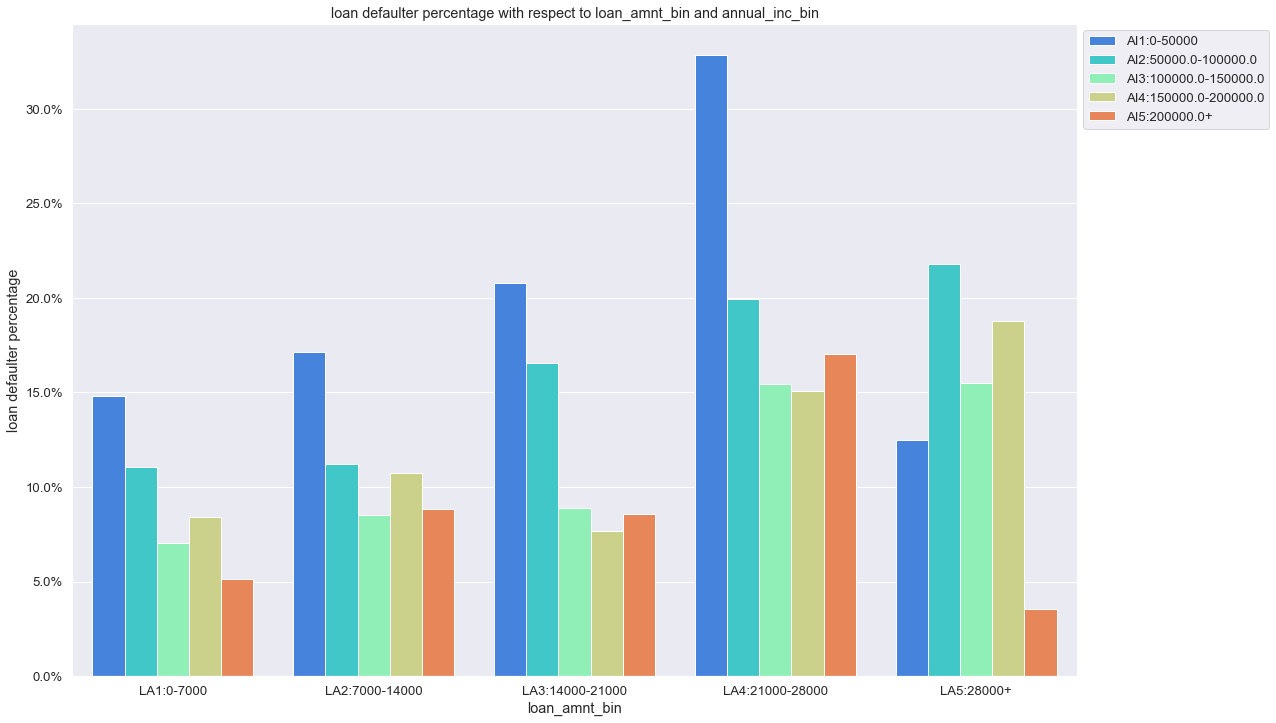

In [83]:
# Bar plot for loan defaulter percentage with respect to loan_amnt_bin(loan_amnt) and annual_inc_bin(annual_inc)

bivariate_analysis('loan_amnt_bin','loan_status', 'annual_inc_bin', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend for every annual_inc_bin(annual_inc) and loan_amnt_bin(loan_amnt).

### Inference: loan_amnt and annual_inc together are driving factors.

## Analyze for loan defaulters percentage with respect to loan_amnt_bin and revol_util_bin.

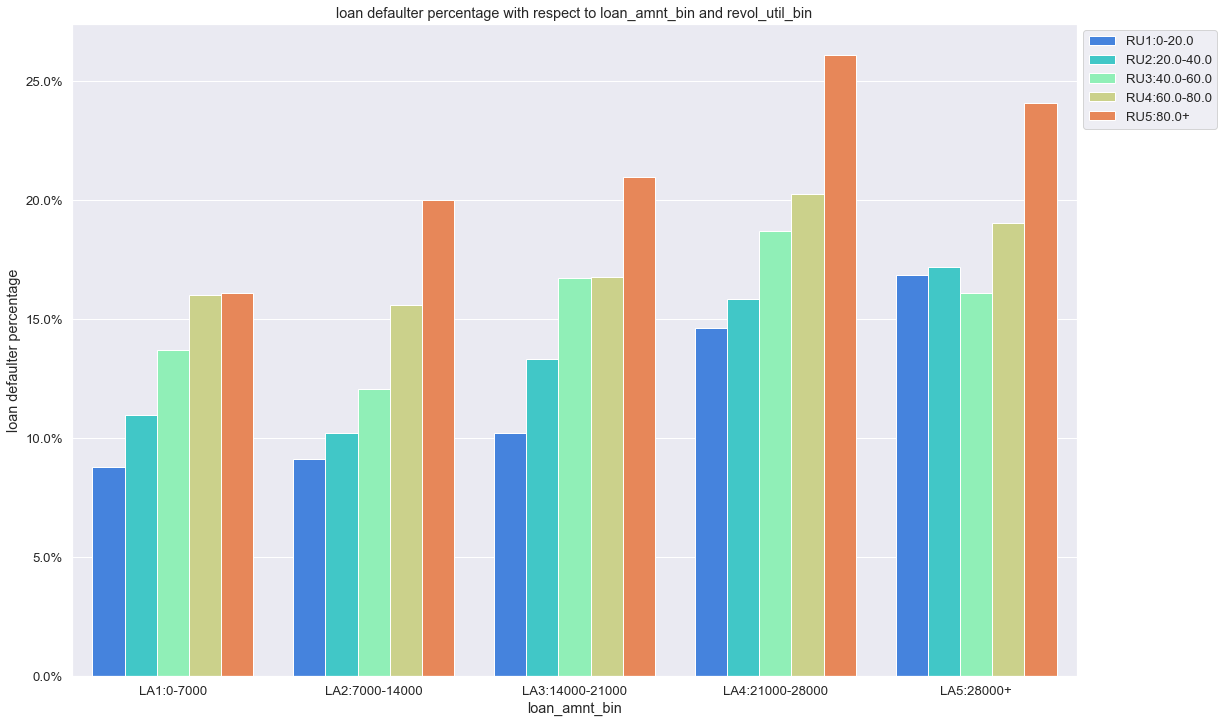

In [84]:
# Bar plot for loan defaulter percentage with respect to loan_amnt_bin(loan_amnt) and revol_util_bin(revol_util)

bivariate_analysis('loan_amnt_bin','loan_status', 'revol_util_bin', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend for every revol_util_bin(revol_util) and loan_amnt_bin(loan_amnt).

### Inference: loan_amnt and revol_util together are driving factors.

## Analyze for loan defaulters percentage with respect to loan_amnt_bin and dti_bin.

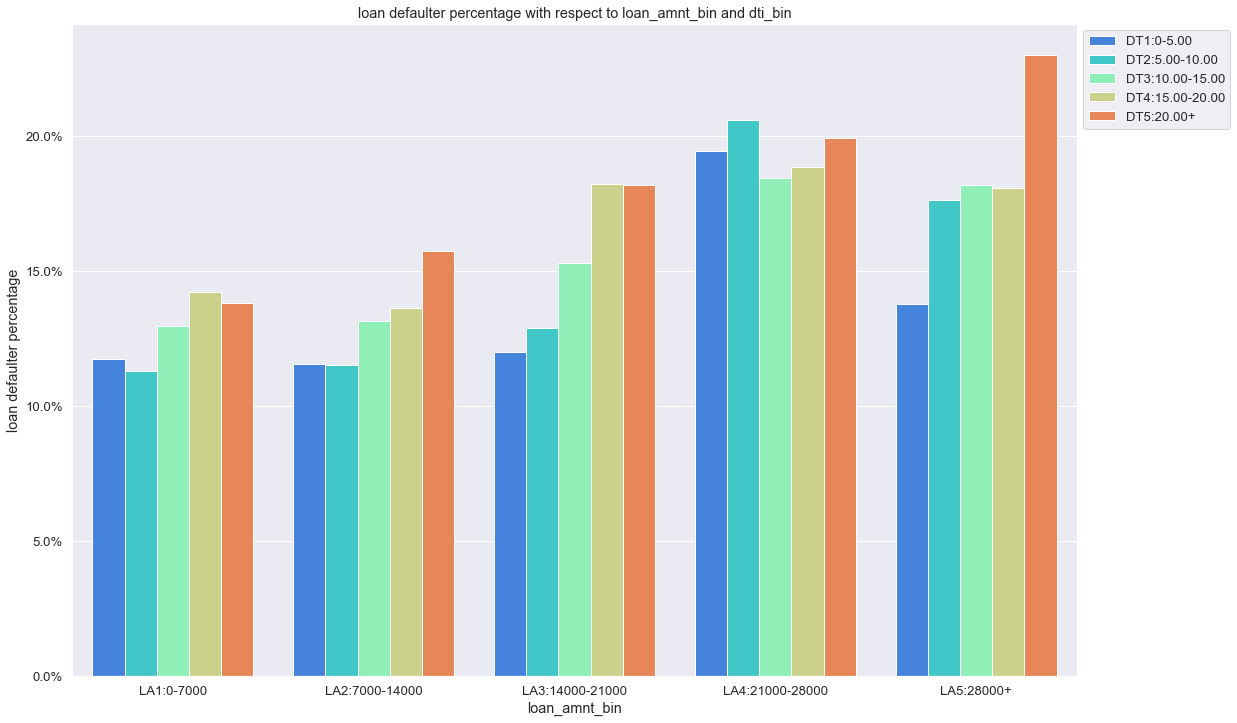

In [85]:
# Bar plot for loan defaulter percentage with respect to loan_amnt_bin(loan_amnt) and dti_bin(dti)

bivariate_analysis('loan_amnt_bin','loan_status', 'dti_bin', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend for every dti_bin(dti) and loan_amnt_bin(loan_amnt).

### Inference: loan_amnt and dti together are driving factors.

## Analyze for loan defaulters percentage with respect to int_rate_bin and annual_inc_bin.

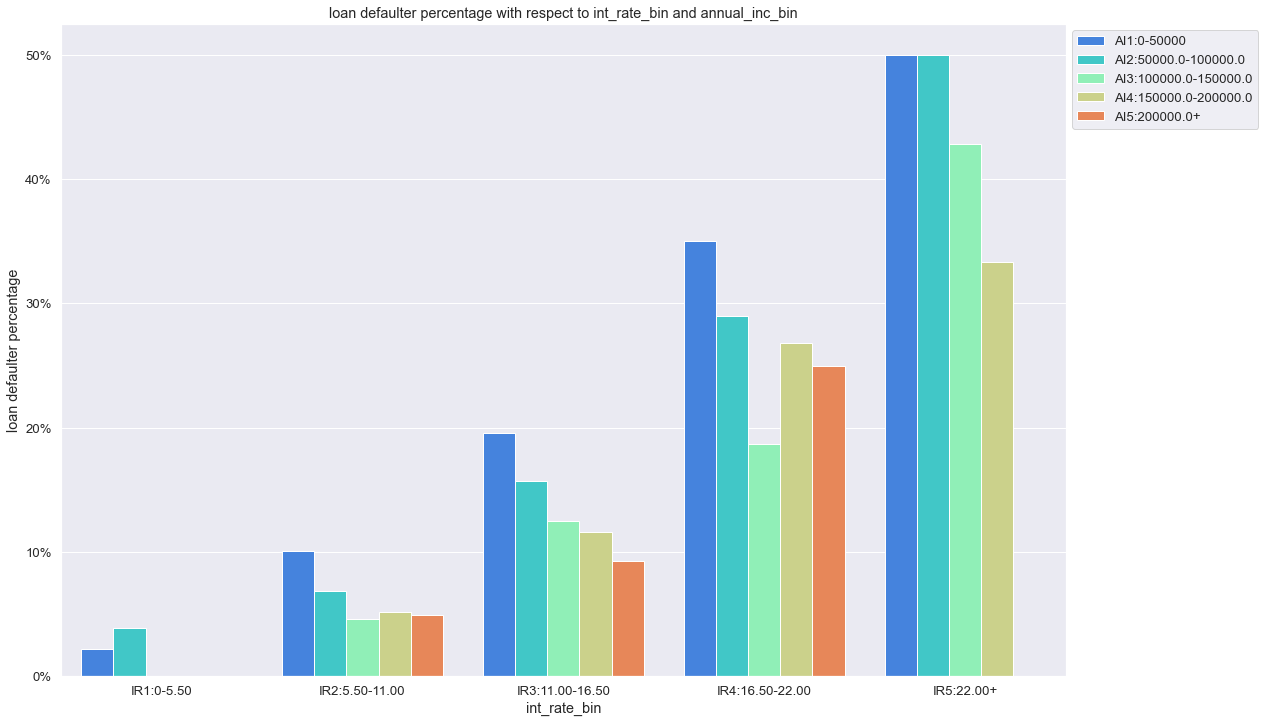

In [86]:
# Bar plot for loan defaulter percentage with respect to int_rate_bin(int_rate) and annual_inc_bin(annual_inc)

bivariate_analysis('int_rate_bin','loan_status', 'annual_inc_bin', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend for every annual_inc_bin(annual_inc) and int_rate_bin(int_rate).

### Inference: int_rate and dti together are driving factors.

## Analyze for loan defaulters percentage with respect to int_rate_bin and revol_util_bin.

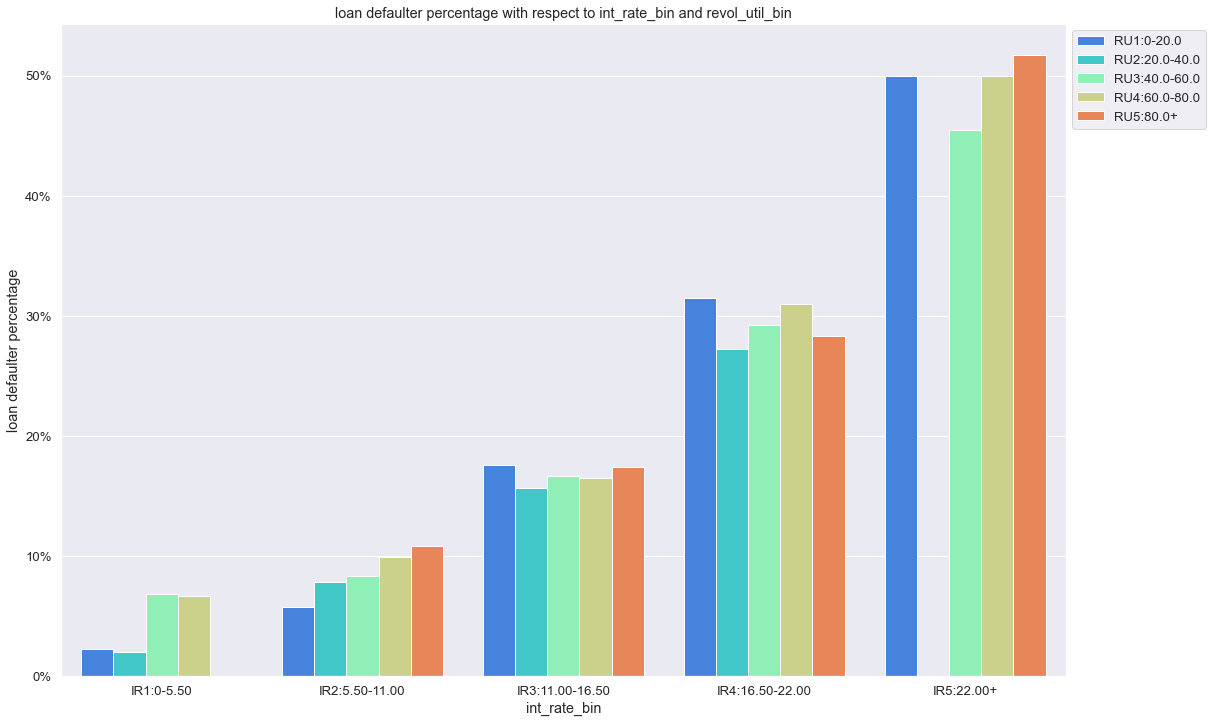

In [87]:
# Bar plot for loan defaulter percentage with respect to int_rate_bin(int_rate) and revol_util_bin(revol_util)

bivariate_analysis('int_rate_bin','loan_status', 'revol_util_bin', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend for every revol_util_bin(revol_util) and int_rate_bin(int_rate).

### Inference: int_rate and revol_util together are driving factors.

## Analyze for loan defaulters percentage with respect to int_rate_bin and dti_bin.

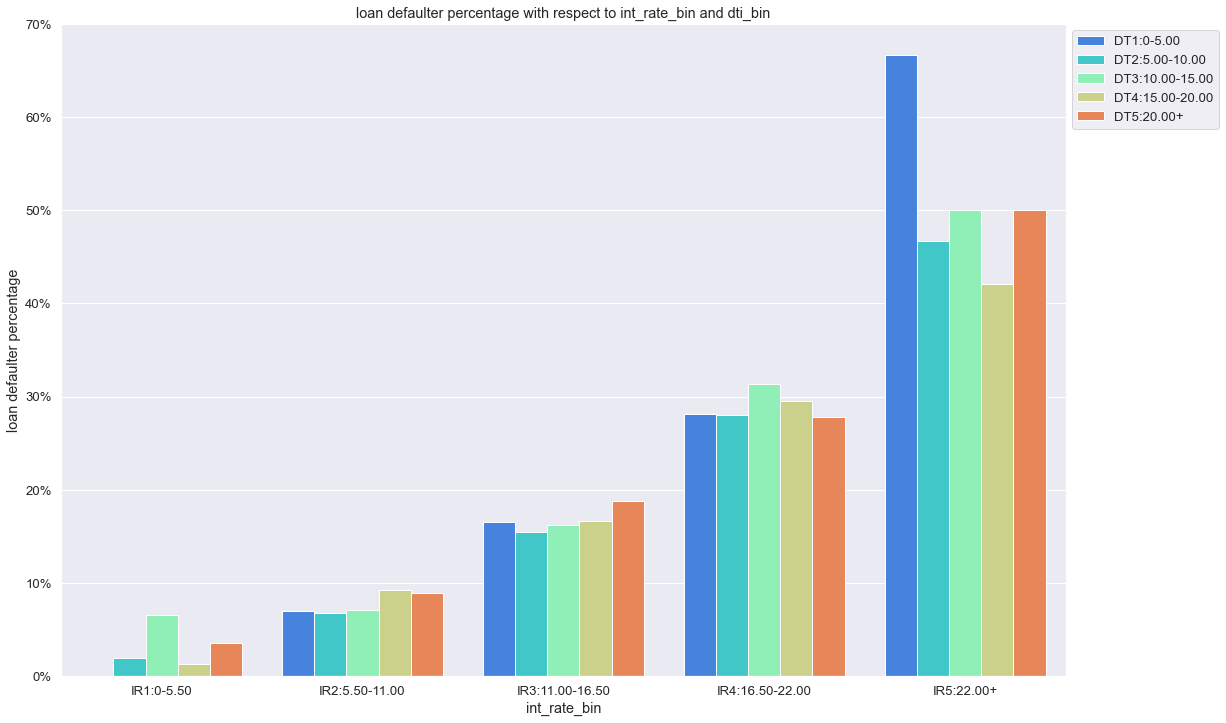

In [88]:
# Bar plot for loan defaulter percentage with respect to int_rate_bin(int_rate) and dti_bin(dti)

bivariate_analysis('int_rate_bin','loan_status', 'dti_bin', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend for every dti_bin(dti) and int_rate_bin(int_rate).

### Inference: int_rate and dti together are driving factors.

## Analyze for loan defaulters percentage with respect to annual_inc_bin and revol_util_bin.

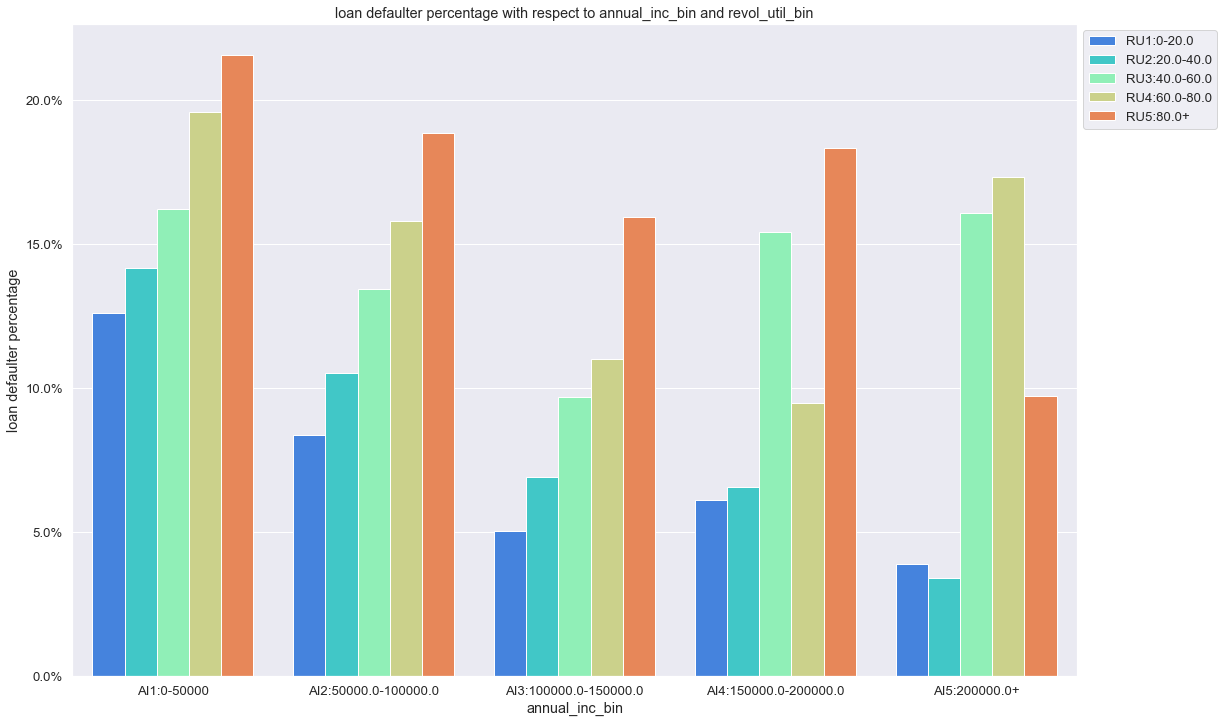

In [89]:
# Bar plot for loan defaulter percentage with respect to annual_inc_bin(annual_inc) and revol_util_bin(revol_util)

bivariate_analysis('annual_inc_bin','loan_status', 'revol_util_bin', 0)

### Observation:

#### loan defaulter percentage displays an decreasing trend for every revol_util_bin(revol_util) and annual_inc_bin(annual_inc).

### Inference: annual_inc and revol_util together are driving factors.

## Analyze for loan defaulters percentage with respect to annual_inc_bin and dti_bin.

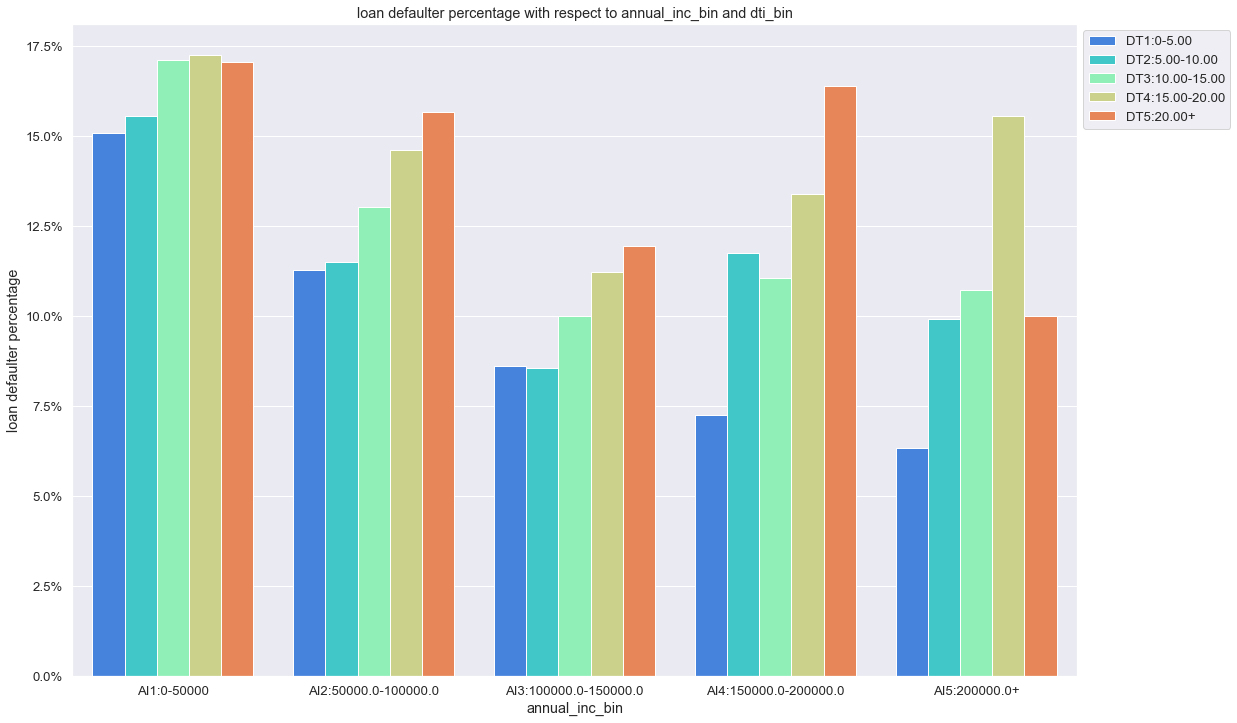

In [90]:
# Bar plot for loan defaulter percentage with respect to annual_inc_bin(annual_inc) and dti_bin(dti)

bivariate_analysis('annual_inc_bin','loan_status', 'dti_bin', 0)

### Observation:

#### loan defaulter percentage displays an decreasing trend for every dti_bin(dti) and annual_inc_bin(annual_inc).

### Inference: annual_inc and dti together are driving factors.

## Analyze for loan defaulters percentage with respect to revol_util_bin and dti_bin.

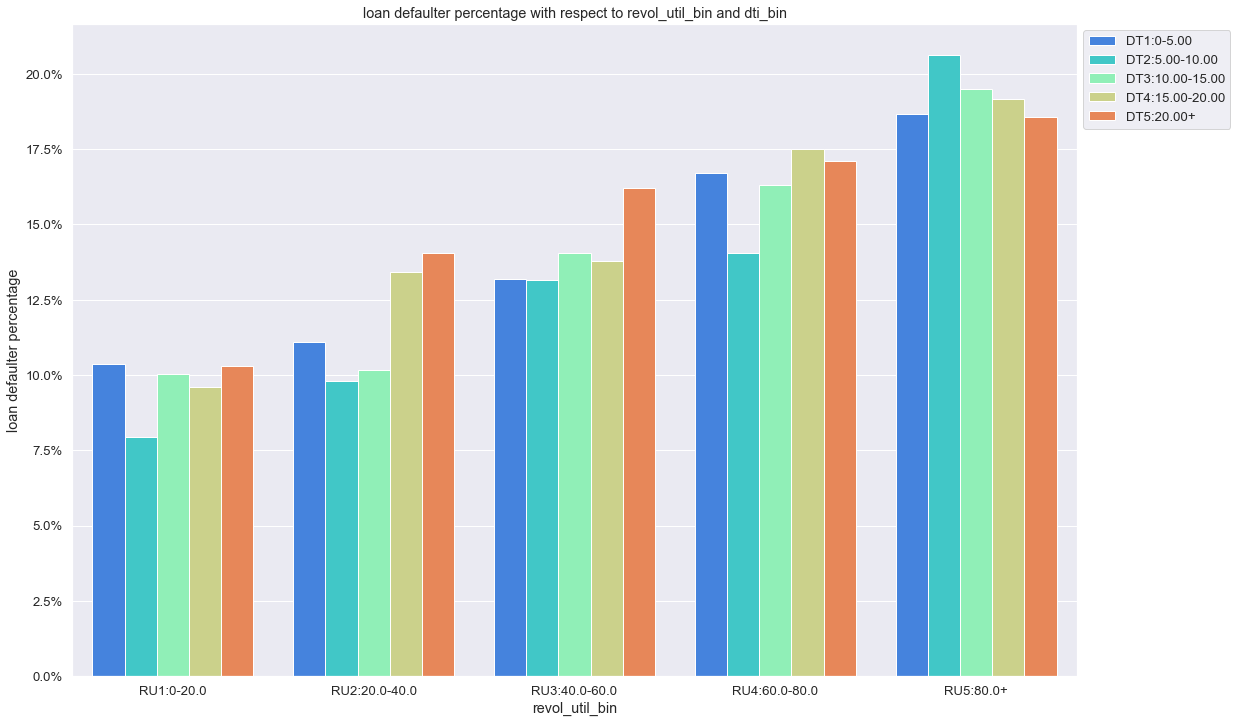

In [91]:
# Bar plot for loan defaulter percentage with respect to revol_util_bin(revol_util) and dti_bin(dti).

bivariate_analysis('revol_util_bin','loan_status', 'dti_bin', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend for every dti_bin(dti) and revol_util_bin(revol_util).

### Inference: revol_util and dti together are driving factors.

## Identified driving factors in the derived metrics: 
### loan_amnt, int_rate, annual_inc, revol_util, dti.

## Bivariate Segment Analysis for Orginal Data and Derived Metrics.

#### We finally perform Bivariate Segmented Analysis for Orginal Data and Derived Metrics together.


#### Identified driving factors in the original data: term, grade, sub grade, purpose, and inq_last_6mths.
#### Identified driving factors in the derived metrics: loan_amnt, int_rate, annual_inc, revol_util, dti.

## Analyze for loan defaulters percentage with respect to loan_amnt_bin and term.

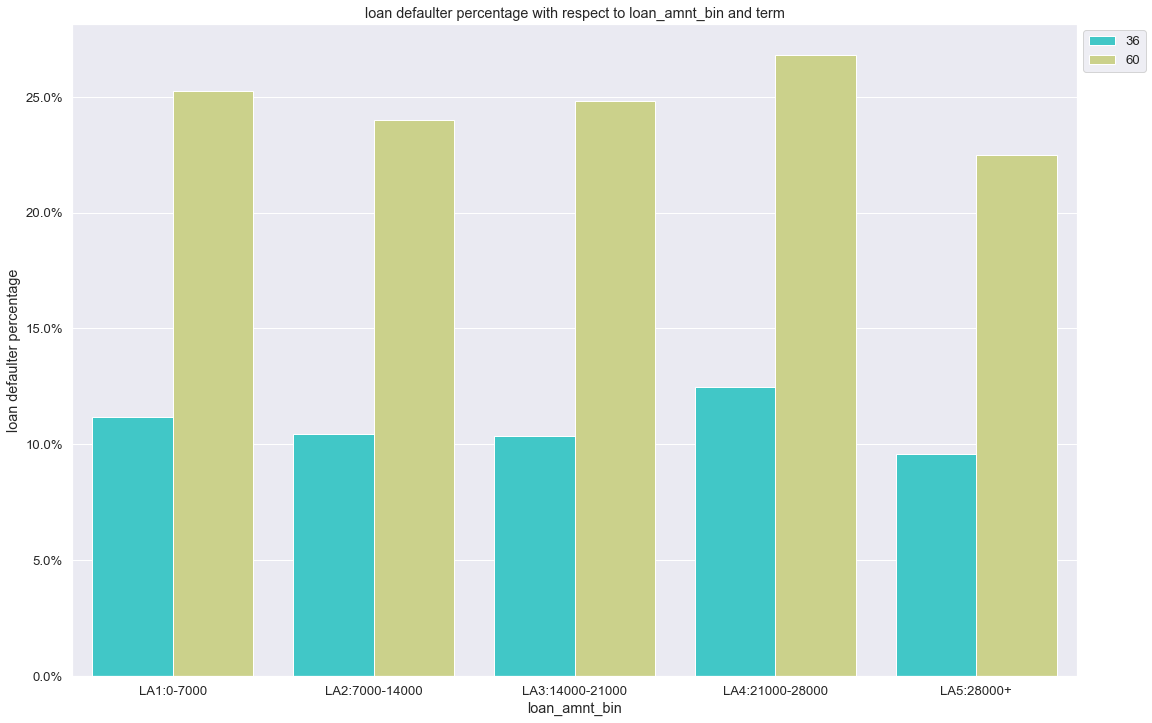

In [92]:
# Bar plot for loan defaulter percentage with respect to loan_amnt_bin(loan_amnt) and term.

bivariate_analysis('loan_amnt_bin','loan_status', 'term', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend for every loan_amnt_bin(loan_amnt) and term.

### Inference: loan_amnt and term together are driving factors.

### Analyze for loan defaulters percentage with respect to loan_amnt_bin and grade.

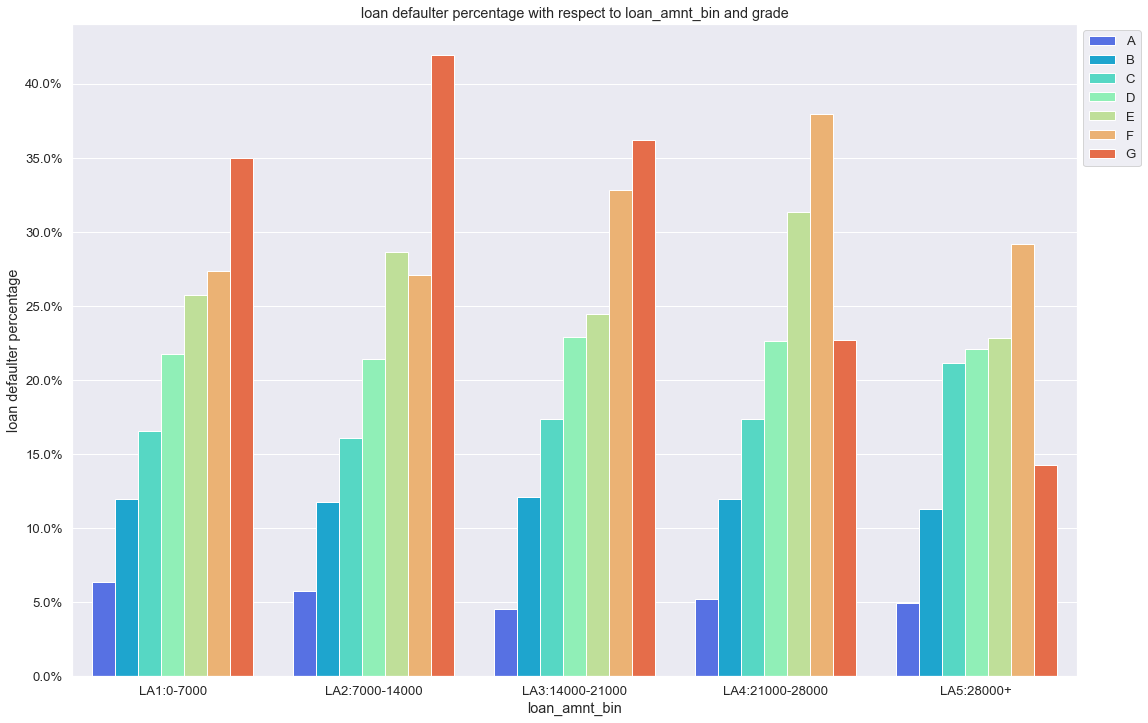

In [93]:
# Bar plot for loan defaulter percentage with respect to loan_amnt_bin(loan_amnt) and grade.

bivariate_analysis('loan_amnt_bin','loan_status', 'grade', 0)

### Observation:

#### loan defaulter percentage displays an increasing trend for every loan_amnt_bin(loan_amnt) and grade.

### Inference: loan_amnt and grade together are driving factors.

## Analyze for loan defaulters percentage with respect to loan_amnt_bin and sub_grade.

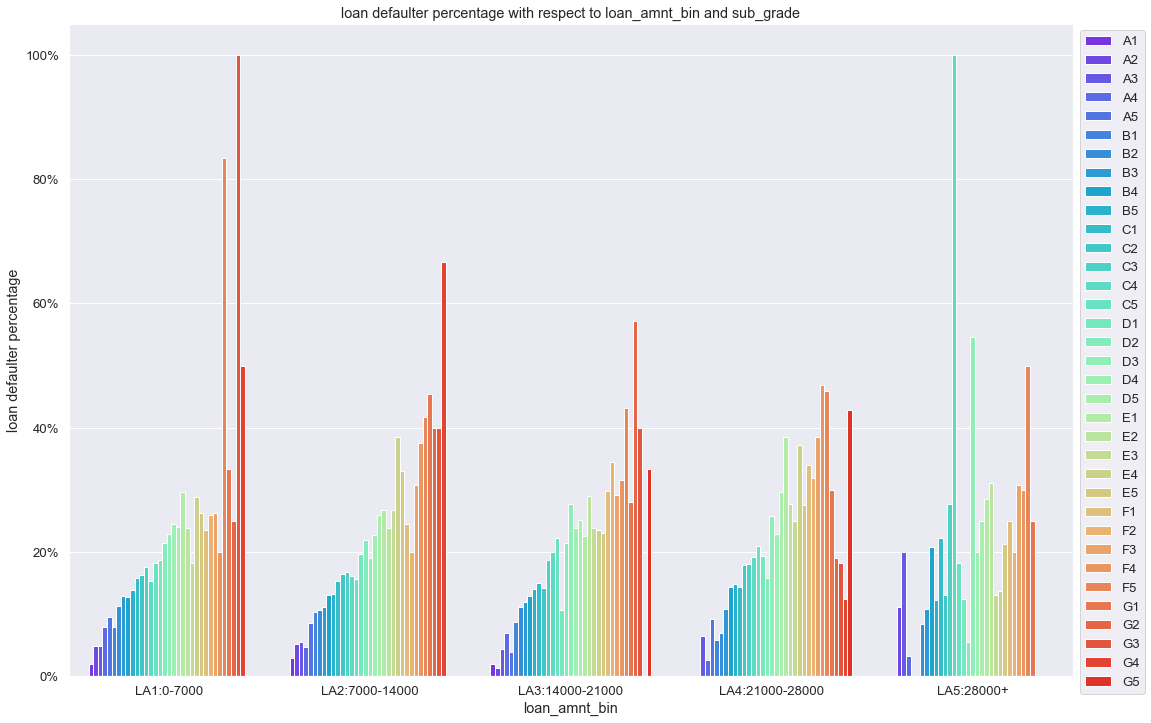

In [94]:
# Bar plot for loan defaulter percentage with respect to loan_amnt_bin(loan_amnt) and sub_grade.

bivariate_analysis('loan_amnt_bin','loan_status', 'sub_grade', 0)

### Observation:

#### loan defaulter percentage displays an increasing trend for every loan_amnt_bin(loan_amnt) and sub_grade.

### Inference: loan_amnt and sub_grade together are driving factors.

## Analyze for loan defaulters percentage with respect to loan_amnt_bin and purpose.

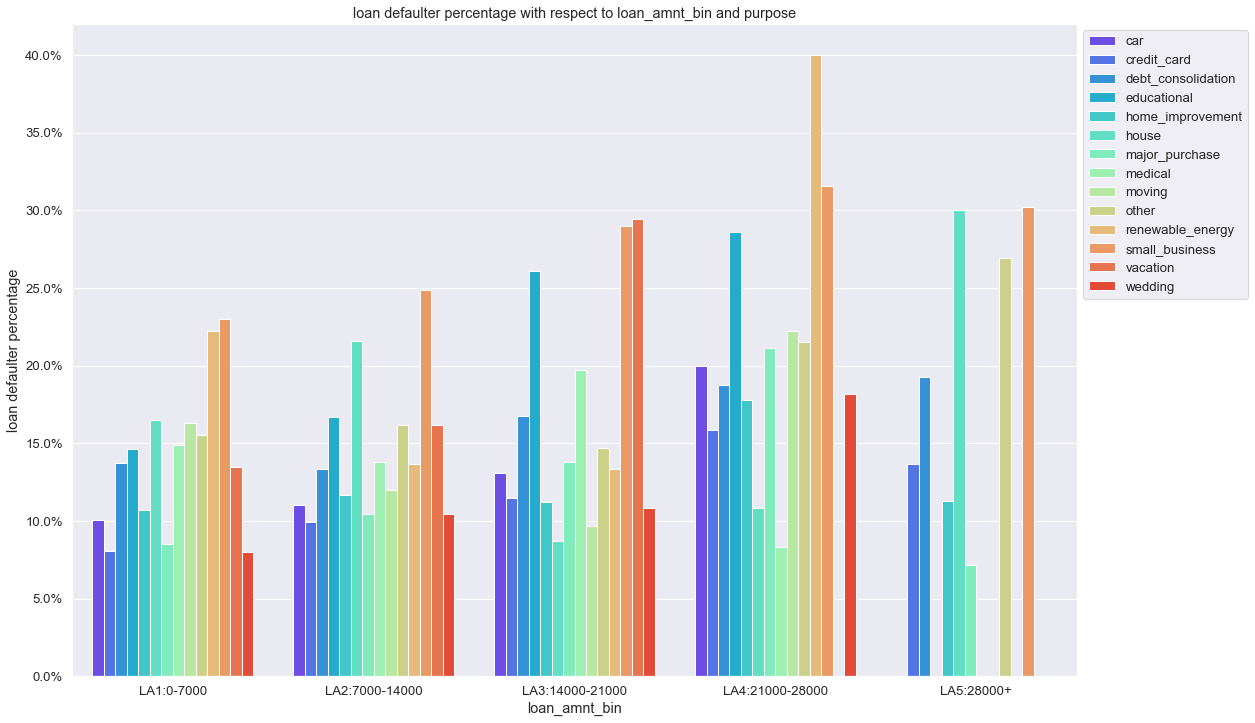

In [95]:
# Bar plot for loan defaulter percentage with respect to loan_amnt_bin(loan_amnt) and purpose.

bivariate_analysis('loan_amnt_bin','loan_status', 'purpose', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend for every loan_amnt_bin(loan_amnt) and purpose.

### Inference: loan_amnt and purpose together are driving factors.

## Analyze for loan defaulters percentage with respect to loan_amnt_bin and inq_last_6mths.

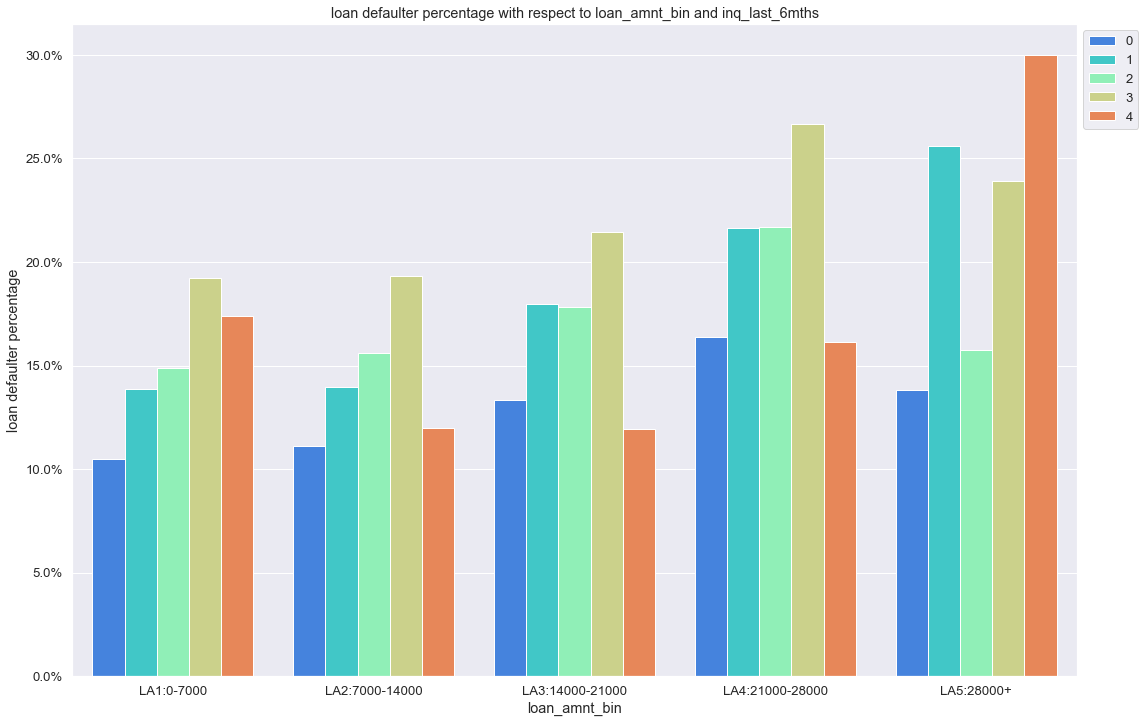

In [96]:
# Bar plot for loan defaulter percentage with respect to loan_amnt_bin(loan_amnt) and inq_last_6mths.

bivariate_analysis('loan_amnt_bin','loan_status', 'inq_last_6mths', 0)

### Observation:
   
#### loan defaulter percentage displays an increasing trend for every loan_amnt_bin(loan_amnt) and inq_last_6mths.

### Inference: loan_amnt and inq_last_6mths together are driving factors.

## Analyze for loan defaulters percentage with respect to int_rate_bin and term.

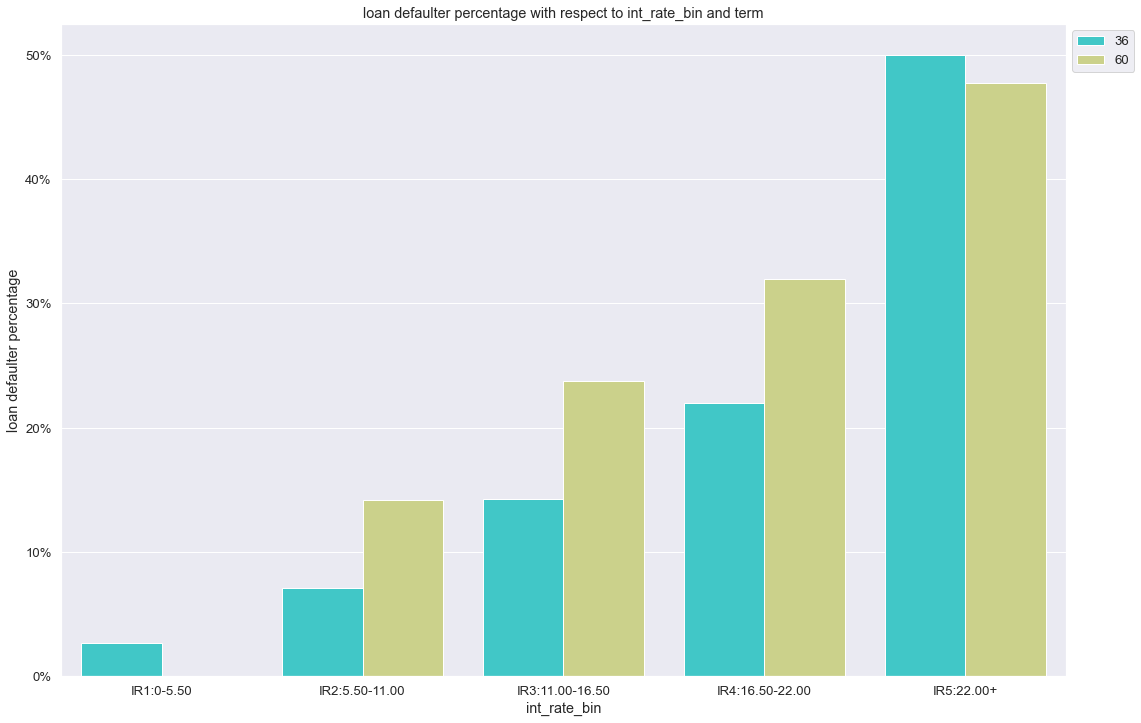

In [97]:
# Bar plot for loan defaulter percentage with respect to int_rate_bin(int_rate) and term.

bivariate_analysis('int_rate_bin','loan_status', 'term', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend for every int_rate_bin(int_rate) and term.

### Inference: int_rate and term together are driving factors.

## Analyze for loan defaulters percentage with respect to int_rate_bin and grade.

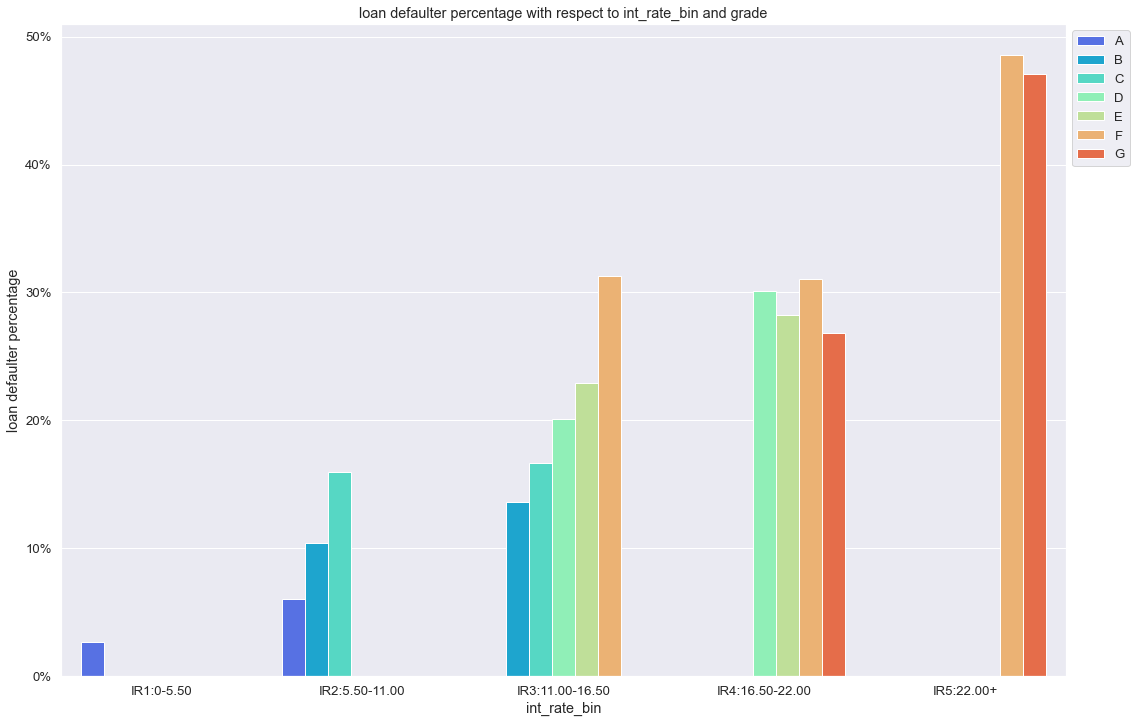

In [98]:
# Bar plot for loan defaulter percentage with respect to int_rate_bin(int_rate) and grade.

bivariate_analysis('int_rate_bin','loan_status', 'grade', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend for every int_rate_bin(int_rate) and grade.

### Inference: int_rate and grade together are driving factors.

## Analyze for loan defaulters percentage with respect to int_rate_bin and sub_grade.

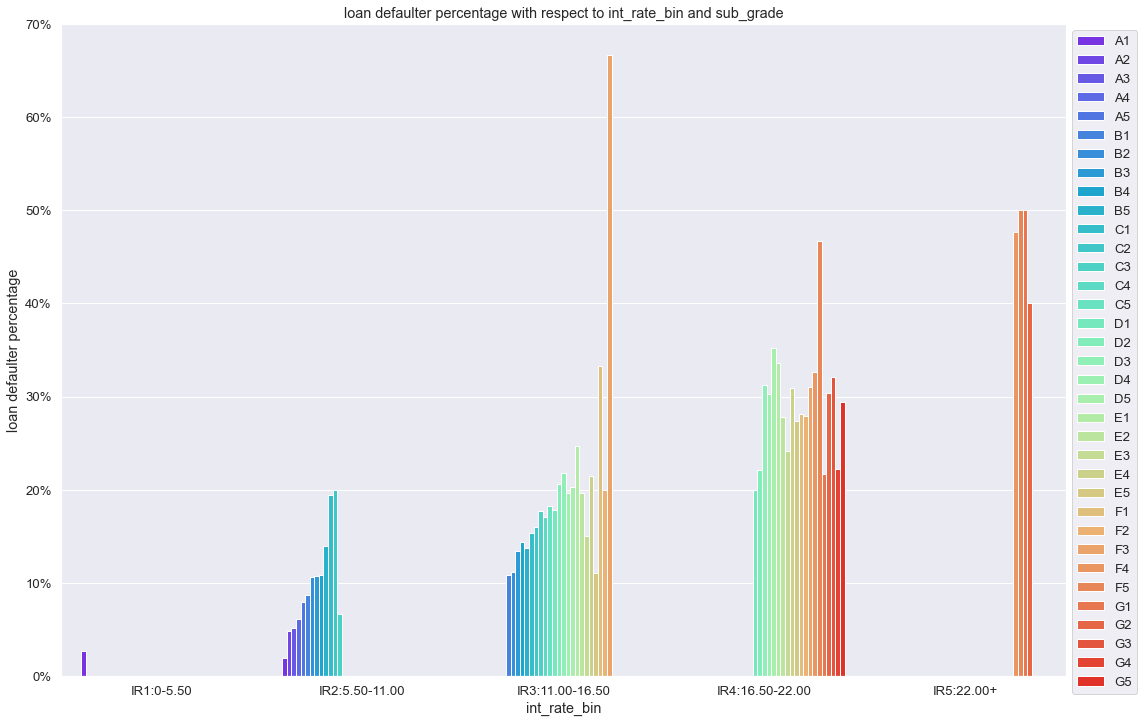

In [99]:
# Bar plot for loan defaulter percentage with respect to int_rate_bin(int_rate) and sub_grade.

bivariate_analysis('int_rate_bin','loan_status', 'sub_grade', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend for every int_rate_bin(int_rate) and sub_grade.

### Inference: int_rate and sub_grade together are driving factors.

## Analyze for loan defaulters percentage with respect to int_rate_bin and purpose.

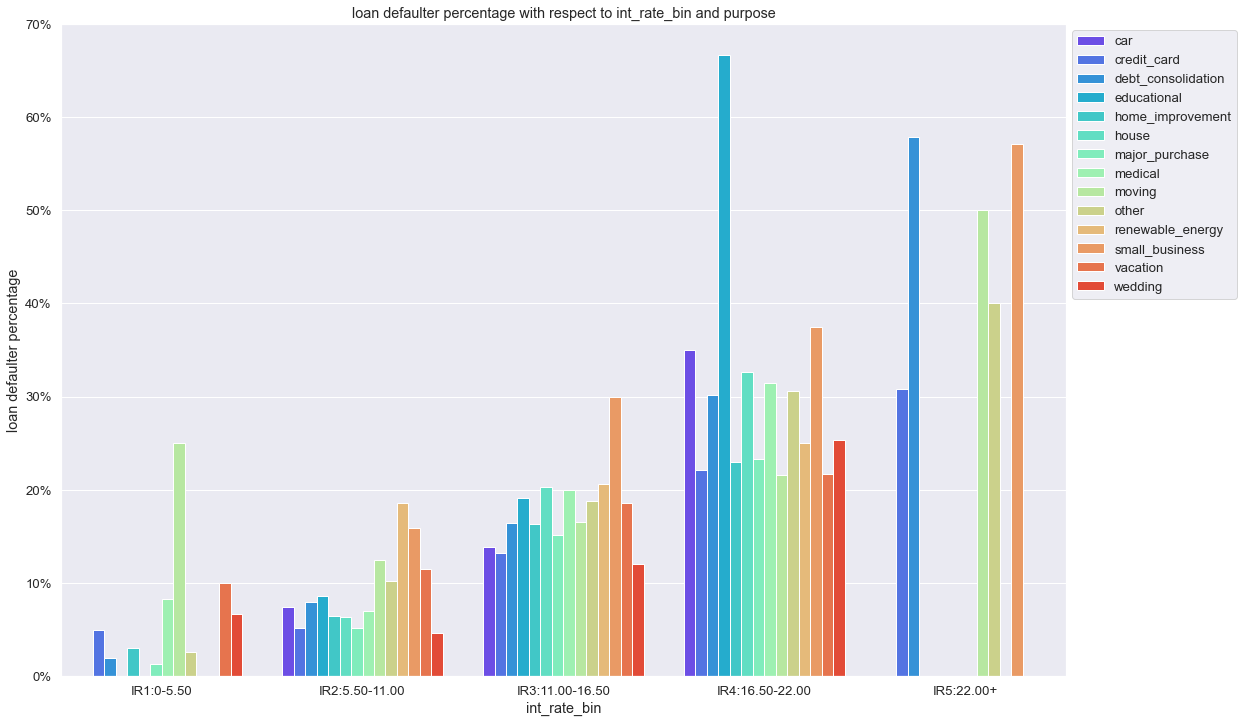

In [100]:
# Bar plot for loan defaulter percentage with respect to int_rate_bin(int_rate) and purpose.

bivariate_analysis('int_rate_bin','loan_status', 'purpose', 0)

### Observation:
   
#### loan defaulter percentage displays an increasing trend for every int_rate_bin(int_rate) and purpose.

### Inference: int_rate and purpose together are driving factors.

## Analyze for loan defaulters percentage with respect to int_rate_bin and inq_last_6mths.

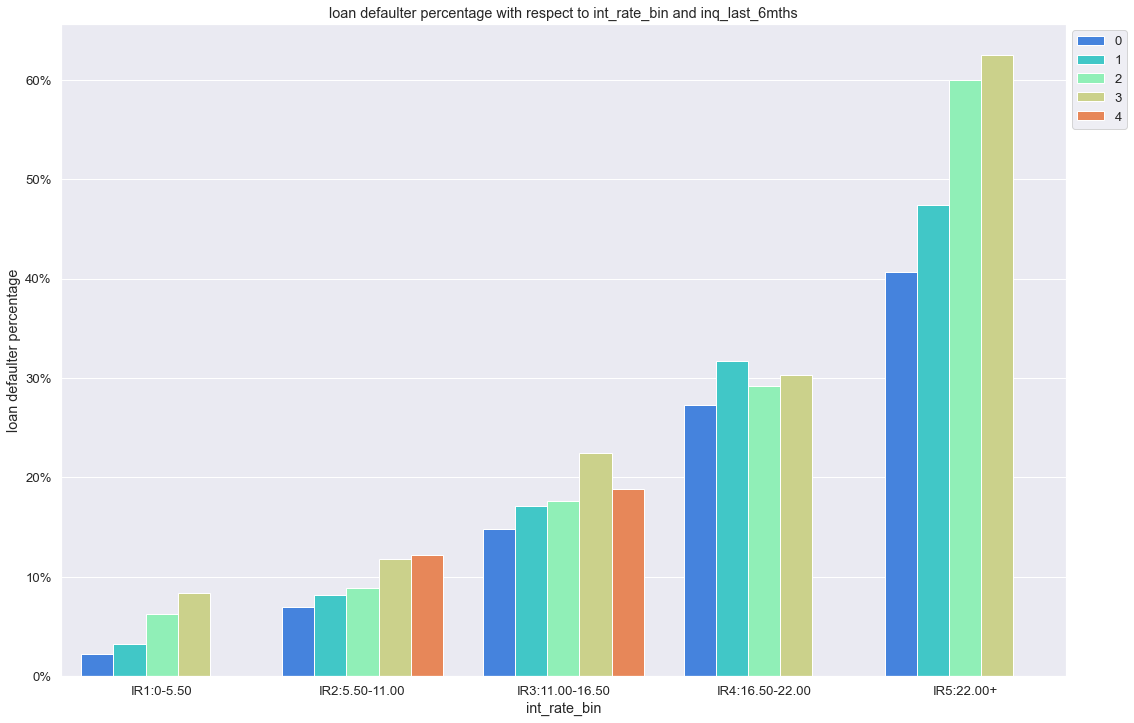

In [101]:
# Bar plot for loan defaulter percentage with respect to int_rate_bin(int_rate) and inq_last_6mths.

bivariate_analysis('int_rate_bin','loan_status', 'inq_last_6mths', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend for every int_rate_bin(int_rate) and inq_last_6mths.

### Inference: int_rate and inq_last_6mths together are driving factors.

## Analyze for loan defaulters percentage with respect to annual_inc_bin and term.

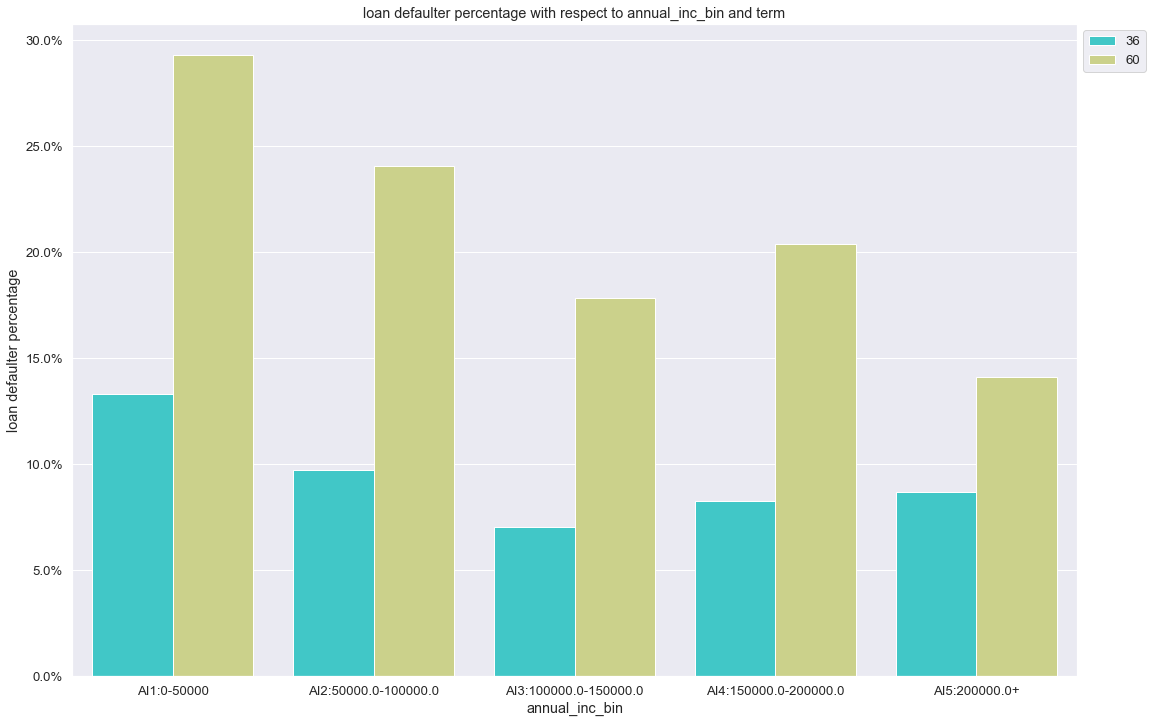

In [102]:
# Bar plot for loan defaulter percentage with respect to annual_inc_bin(annual_inc) and term.

bivariate_analysis('annual_inc_bin','loan_status', 'term', 0)

### Observation:
    
#### loan defaulter percentage displays an decreasing trend for every annual_inc_bin(annual_inc) and term.

### Inference: annual_inc and term together are driving factors.

## Analyze for loan defaulters percentage with respect to annual_inc_bin and grade.

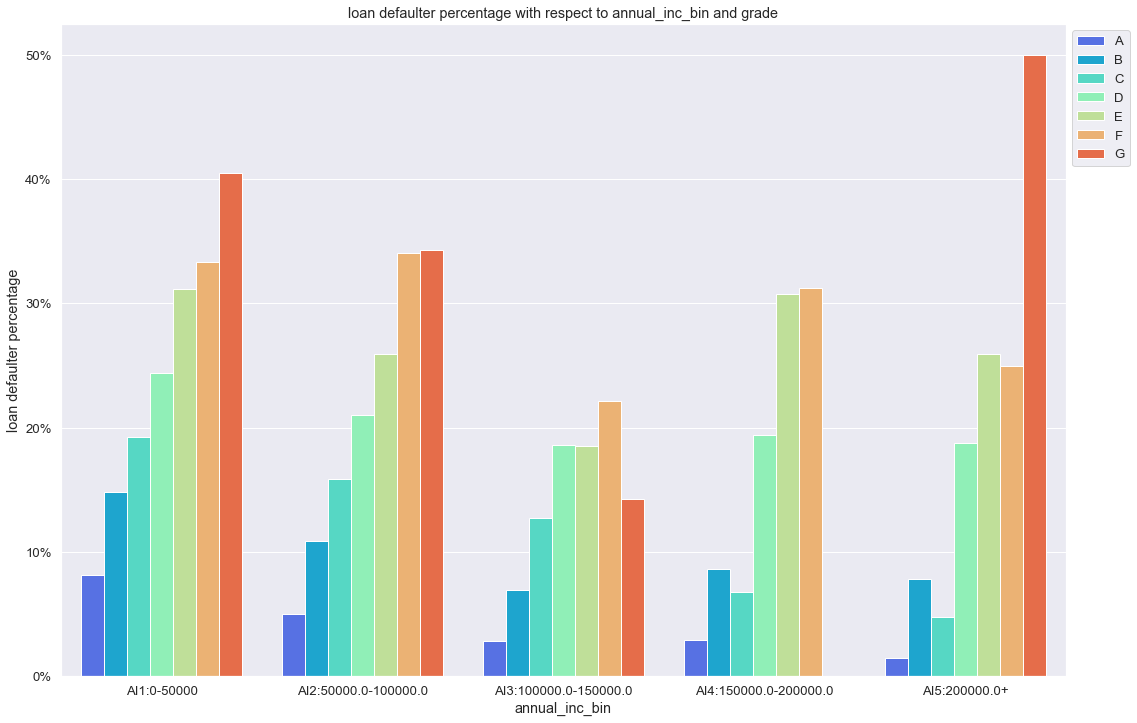

In [103]:
# Bar plot for loan defaulter percentage with respect to annual_inc_bin(annual_inc) and grade.

bivariate_analysis('annual_inc_bin','loan_status', 'grade', 0)

### Observation:
    
#### loan defaulter percentage displays an decreasing trend for every annual_inc_bin(annual_inc) and grade.

### Inference: annual_inc and grade together are driving factors.

## Analyze for loan defaulters percentage with respect to annual_inc_bin and sub_grade.

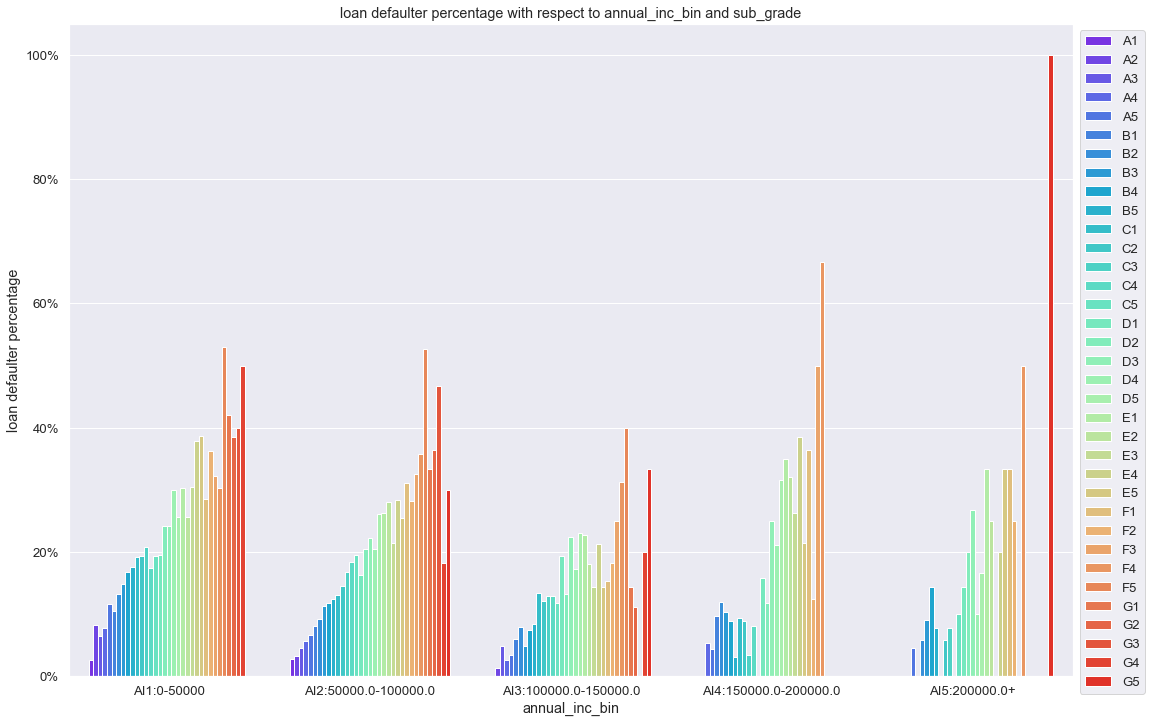

In [104]:
# Bar plot for loan defaulter percentage with respect to annual_inc_bin(annual_inc) and sub_grade.

bivariate_analysis('annual_inc_bin','loan_status', 'sub_grade', 0)

### Observation:
 
#### loan defaulter percentage displays an decreasing trend for every annual_inc_bin(annual_inc) and sub_grade.

### Inference: annual_inc and sub_grade together are driving factors.

## Analyze for loan defaulters percentage with respect to annual_inc_bin and purpose.

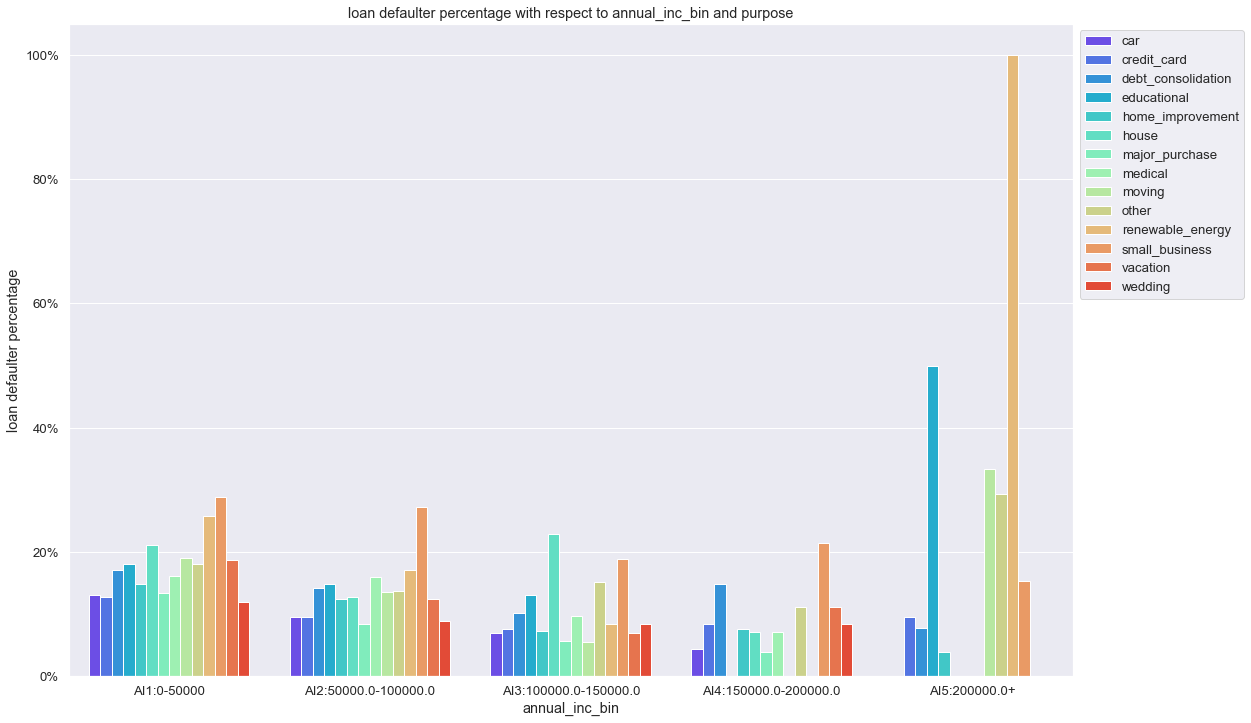

In [105]:
# Bar plot for loan defaulter percentage with respect to annual_inc_bin(annual_inc) and purpose.

bivariate_analysis('annual_inc_bin','loan_status', 'purpose', 0)

### Observation:
    
#### loan defaulter percentage displays an decreasing trend for every annual_inc_bin(annual_inc) and purpose.

### Inference: annual_inc and purpose together are driving factors.

## Analyze for loan defaulters percentage with respect to annual_inc_bin and inq_last_6mths.

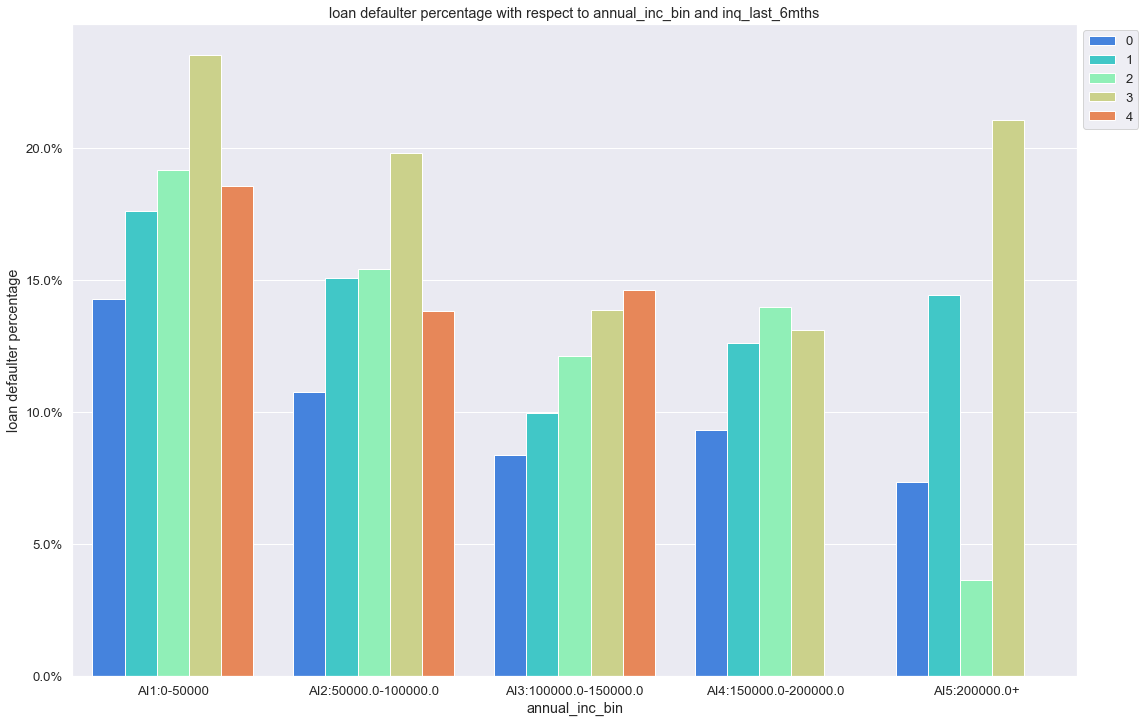

In [106]:
# Bar plot for loan defaulter percentage with respect to annual_inc_bin(annual_inc) and inq_last_6mths.

bivariate_analysis('annual_inc_bin','loan_status', 'inq_last_6mths', 0)

### Observation:
    
#### loan defaulter percentage displays an decreasing trend for every annual_inc_bin(annual_inc) and inq_last_6mths.

### Inference: annual_inc and inq_last_6mths together are driving factors.

## Analyze for loan defaulters percentage with respect to revol_util_bin and term.

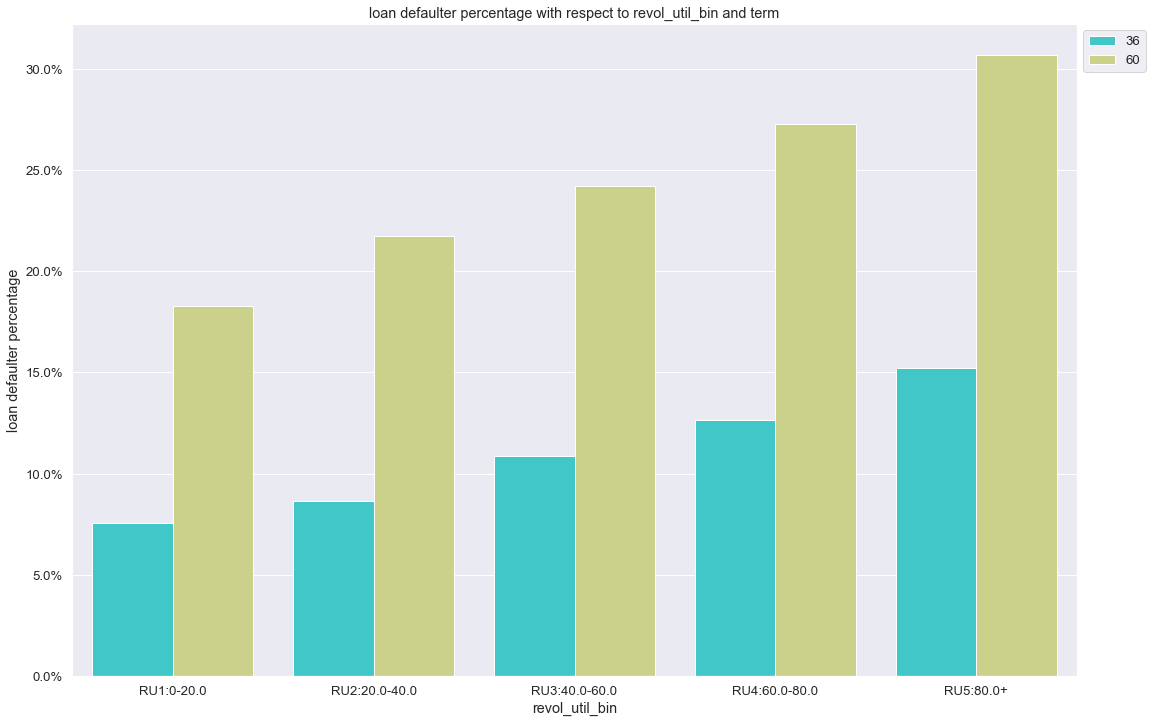

In [107]:
# Bar plot for loan defaulter percentage with respect to revol_util_bin(revol_util) and term.

bivariate_analysis('revol_util_bin','loan_status', 'term', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend for every revol_util_bin(revol_util) and term.

### Inference: revol_util and term together are driving factors.

## Analyze for loan defaulters percentage with respect to revol_util_bin and grade.

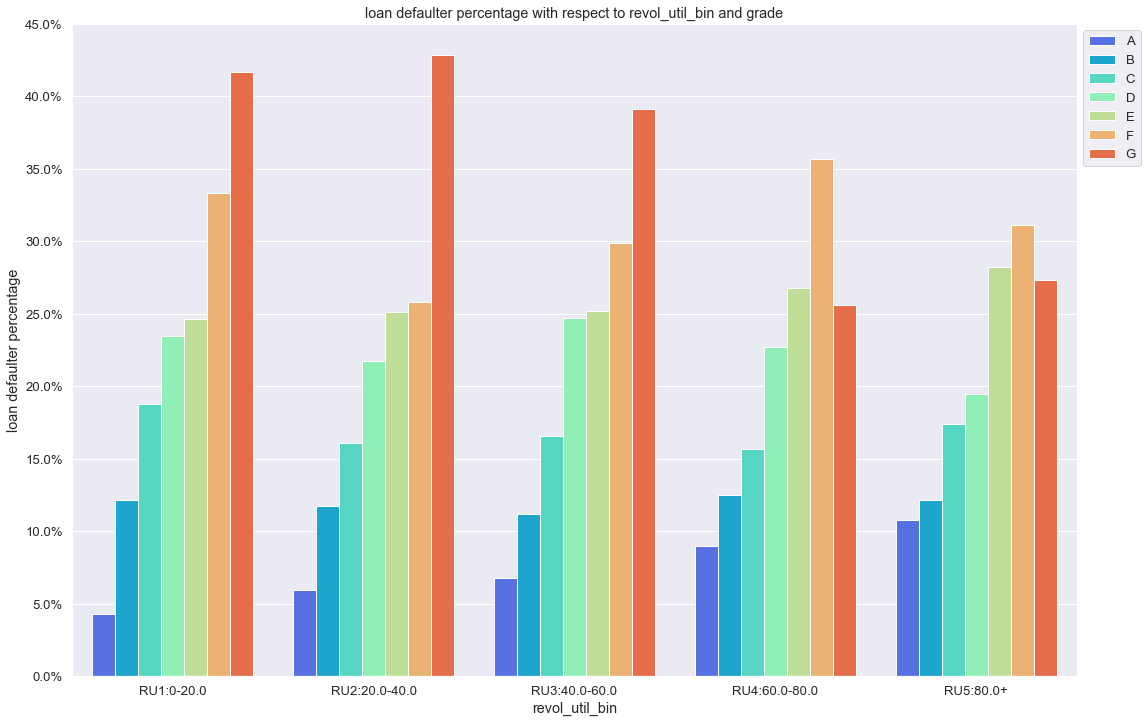

In [108]:
# Bar plot for loan defaulter percentage with respect to revol_util_bin(revol_util) and grade.

bivariate_analysis('revol_util_bin','loan_status', 'grade', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend for every revol_util_bin(revol_util) and grade.

### Inference: revol_util and grade together are driving factors.

## Analyze for loan defaulters percentage with respect to revol_util_bin and sub_grade.

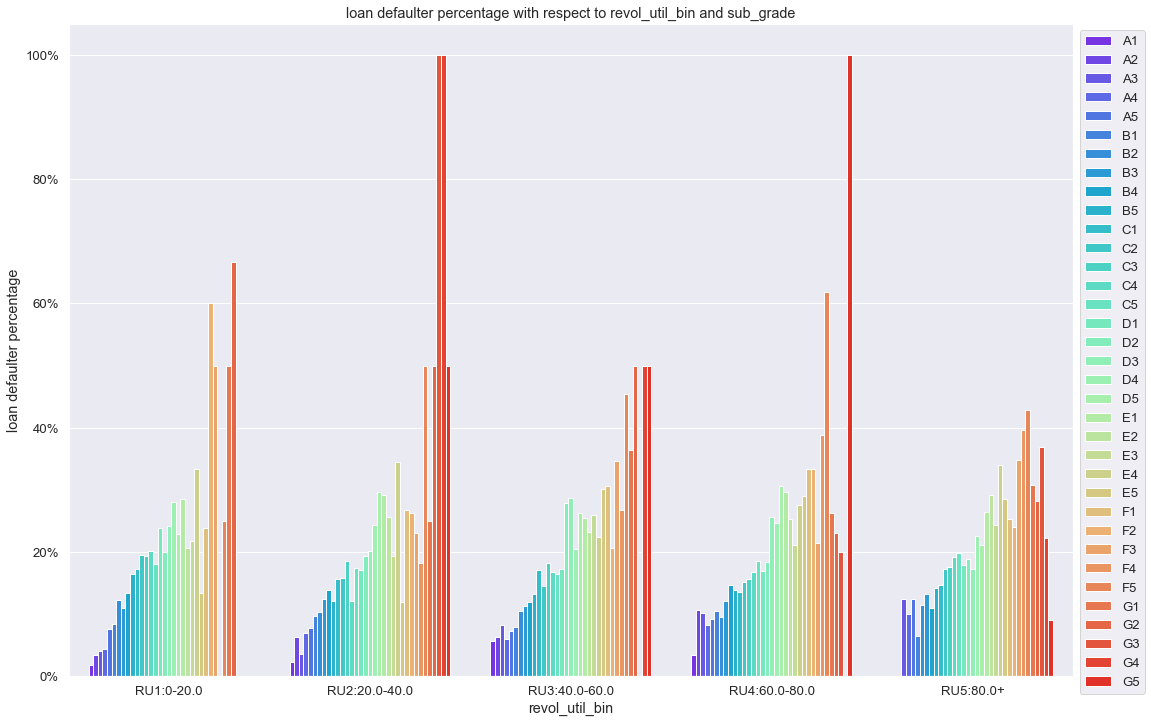

In [109]:
# Bar plot for loan defaulter percentage with respect to revol_util_bin(revol_util) and sub_grade.

bivariate_analysis('revol_util_bin','loan_status', 'sub_grade', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend for every revol_util_bin(revol_util) and sub_grade.

### Inference: revol_util and sub_grade together are driving factors.

## Analyze for loan defaulters percentage with respect to revol_util_bin and purpose.

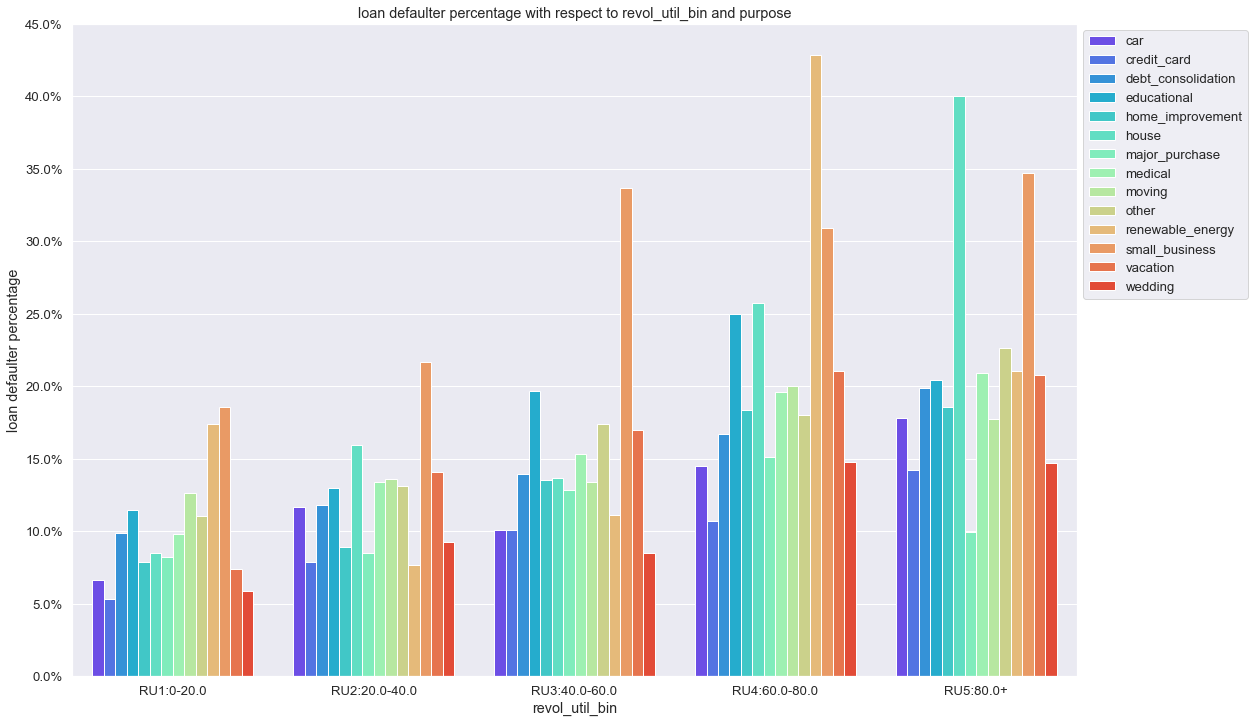

In [110]:
# Bar plot for loan defaulter percentage with respect to revol_util_bin(revol_util) and purpose.

bivariate_analysis('revol_util_bin','loan_status', 'purpose', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend for every revol_util_bin(revol_util) and purpose.

### Inference: revol_util and purpose together are driving factors.

## Analyze for loan defaulters percentage with respect to revol_util_bin and inq_last_6mths.

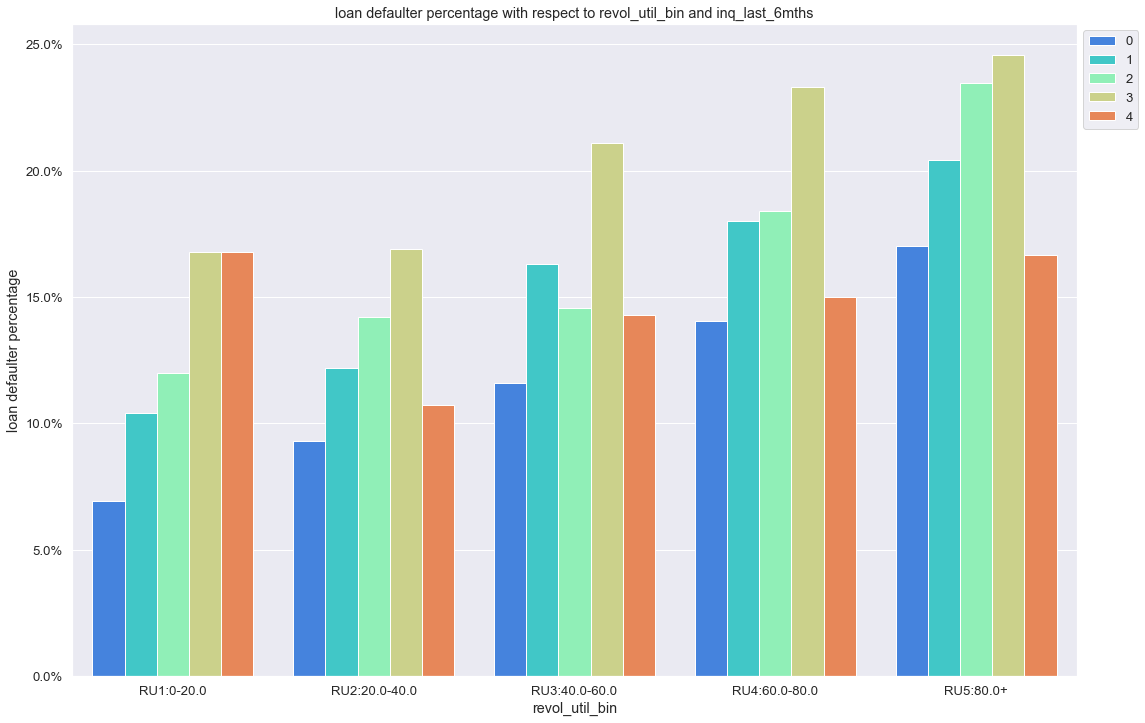

In [111]:
# Bar plot for loan defaulter percentage with respect to revol_util_bin(revol_util) and inq_last_6mths.

bivariate_analysis('revol_util_bin','loan_status', 'inq_last_6mths', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend for every revol_util_bin(revol_util) and inq_last_6mths.

### Inference: revol_util and inq_last_6mths together are driving factors.

## Analyze for loan defaulters percentage with respect to dti_bin and term.

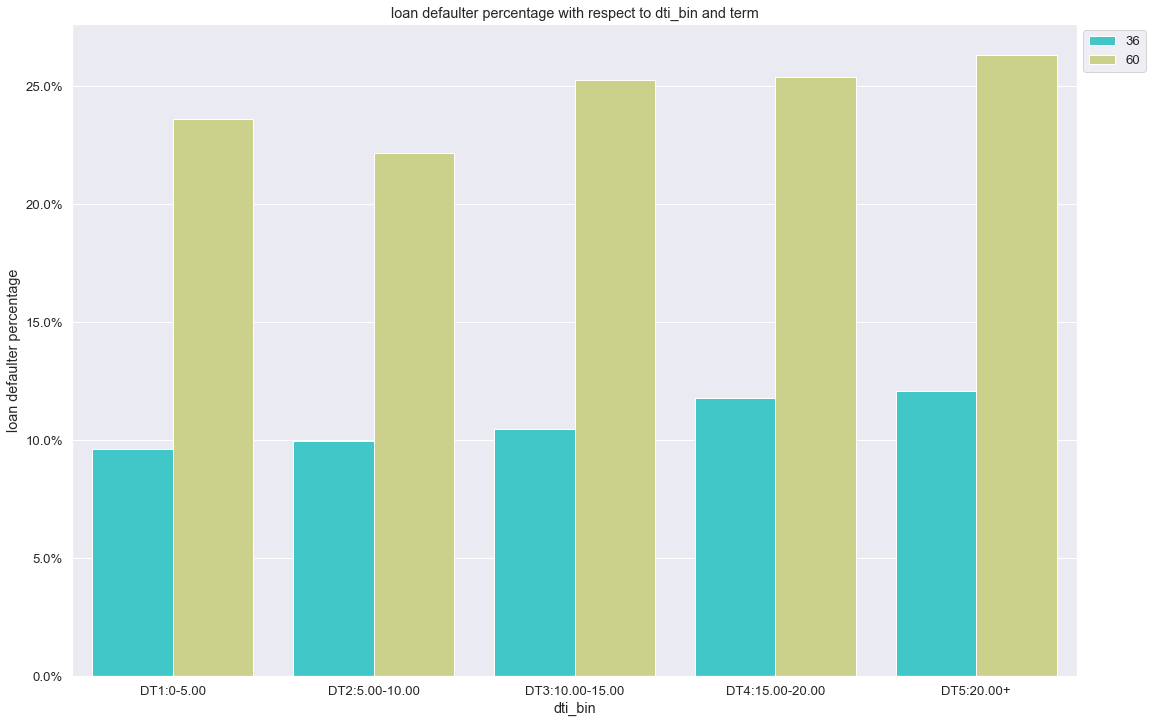

In [112]:
# Bar plot for loan defaulter percentage with respect to dti_bin(dti) and term.

bivariate_analysis('dti_bin','loan_status', 'term', 0)

### Observation:
   
#### loan defaulter percentage displays an increasing trend for every dti_bin(dti) and term.

### Inference: dti and term together are driving factors.

## Analyze for loan defaulters percentage with respect to dti_bin and grade.

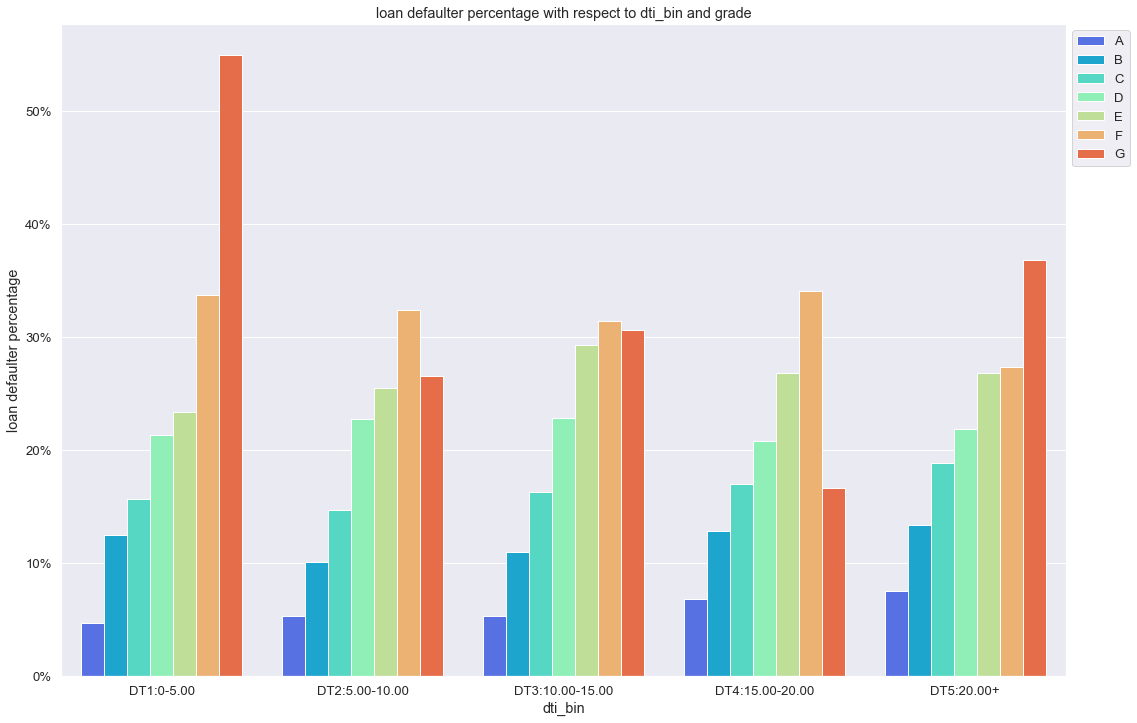

In [113]:
# Bar plot for loan defaulter percentage with respect to dti_bin(dti) and grade.

bivariate_analysis('dti_bin','loan_status', 'grade', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend for every dti_bin(dti) and grade.

### Inference: dti and grade together are driving factors.

## Analyze for loan defaulters percentage with respect to dti_bin and sub_grade.

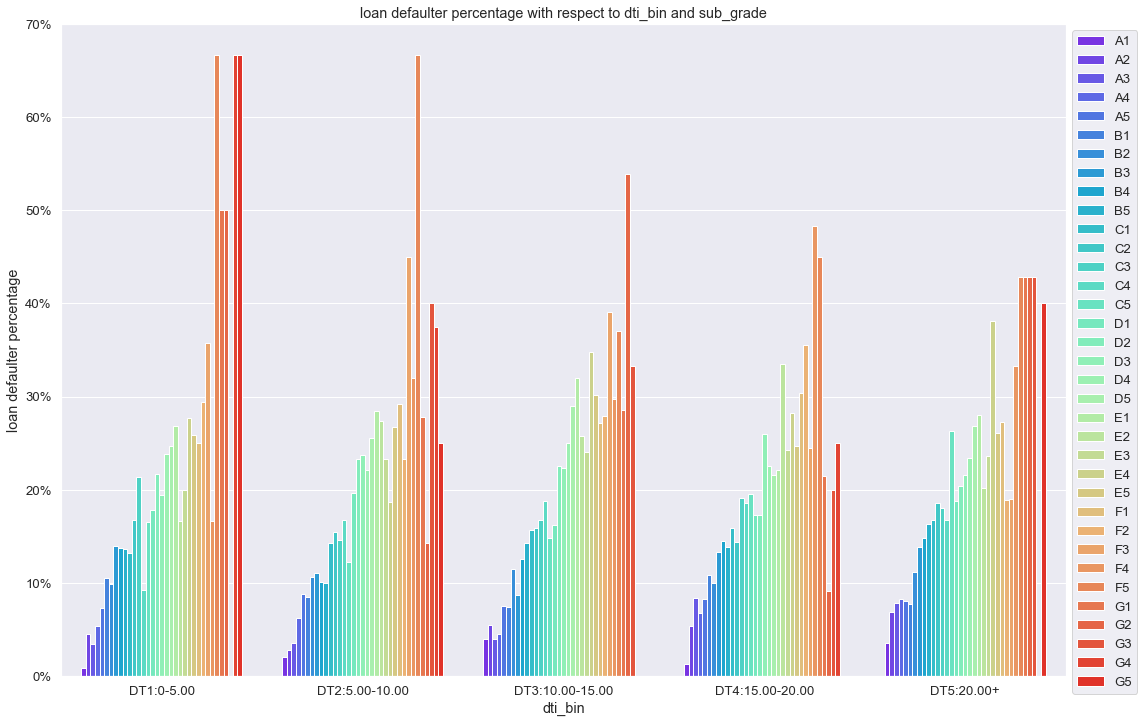

In [114]:
# Bar plot for loan defaulter percentage with respect to dti_bin(dti) and sub_grade.

bivariate_analysis('dti_bin','loan_status', 'sub_grade', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend for every dti_bin(dti) and sub_grade.

### Inference: dti and sub_grade together are driving factors.

## Analyze for loan defaulters percentage with respect to dti_bin and purpose.

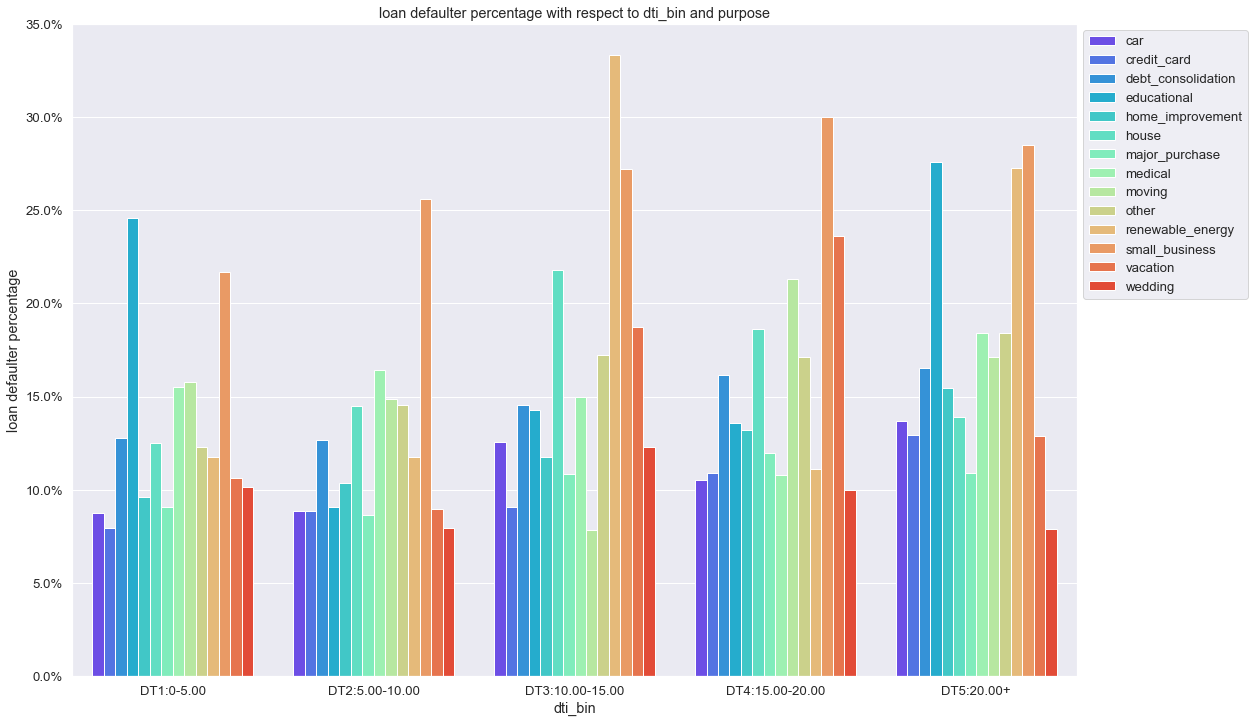

In [120]:
# Bar plot for loan defaulter percentage with respect to dti_bin(dti) and purpose.

bivariate_analysis('dti_bin','loan_status', 'purpose', 0)

### Observation:
    
#### loan defaulter percentage displays an increasing trend for every dti_bin(dti) and purpose.

### Inference: dti and purpose together are driving factors.

## Analyze for loan defaulters percentage with respect to dti_bin and inq_last_6mths.

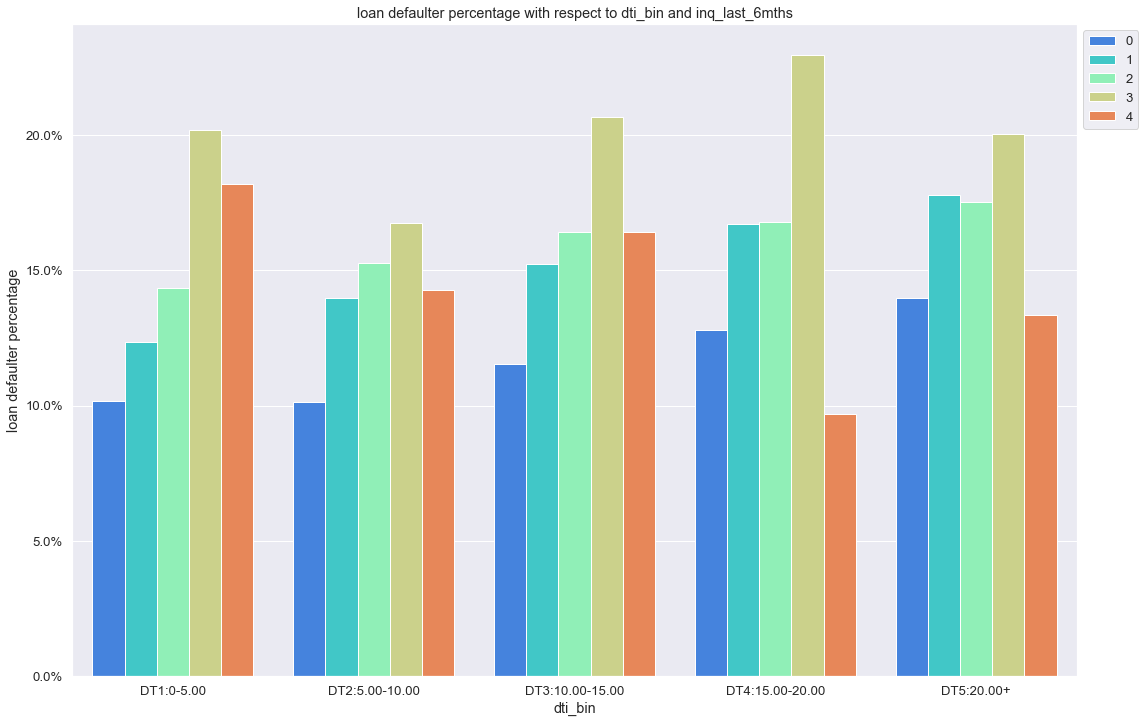

In [116]:
# Bar plot for loan defaulter percentage with respect to dti_bin(dti) and inq_last_6mths.

bivariate_analysis('dti_bin','loan_status', 'inq_last_6mths', 0)

### Observation:
  
#### loan defaulter percentage displays an increasing trend for every dti_bin(dti) and inq_last_6mths.

### Inference: dti and inq_last_6mths together are driving factors.

## Identified driving factors in the original data: 
### term, grade, sub grade, purpose, and inq_last_6mths.
## Identified driving factors in the derived metrics:
### loan_amnt, int_rate, annual_inc, revol_util, dti.

## Multivariate Analysis

### Pearson's Correlation

In [117]:
# Pearson's correlation

loan.corr(method ='pearson')

,loan_amnt,term,int_rate,emp_length,annual_inc,loan_status,dti,inq_last_6mths,open_acc,revol_util,total_acc
loan_amnt,1.000000,0.319215,0.267970,0.141849,0.384941,0.051359,0.073516,-0.004713,0.175571,0.066668,0.246859
term,0.319215,1.000000,0.428542,0.097685,0.049033,0.170896,0.079957,0.042209,0.039938,0.065586,0.086786
int_rate,0.267970,0.428542,1.000000,-0.009699,0.035303,0.209013,0.109121,0.138442,-0.044458,0.474655,-0.091888
emp_length,0.141849,0.097685,-0.009699,1.000000,0.168447,0.013324,0.050402,0.004260,0.094913,0.010866,0.209050
annual_inc,0.384941,0.049033,0.035303,0.168447,1.000000,-0.064789,-0.123598,0.029923,0.252293,0.034425,0.371807
loan_status,0.051359,0.170896,0.209013,0.013324,-0.064789,1.000000,0.041617,0.069658,-0.012220,0.098127,-0.024764
dti,0.073516,0.079957,0.109121,0.050402,-0.123598,0.041617,1.000000,0.011559,0.297142,0.281060,0.234522
inq_last_6mths,-0.004713,0.042209,0.138442,0.004260,0.029923,0.069658,0.011559,1.000000,0.085712,-0.047135,0.098800
open_acc,0.175571,0.039938,-0.044458,0.094913,0.252293,-0.012220,0.297142,0.085712,1.000000,-0.080976,0.666853
revol_util,0.066668,0.065586,0.474655,0.010866,0.034425,0.098127,0.281060,-0.047135,-0.080976,1.000000,-0.060831


### Heatmap for Multivariate Analysis

<AxesSubplot:>

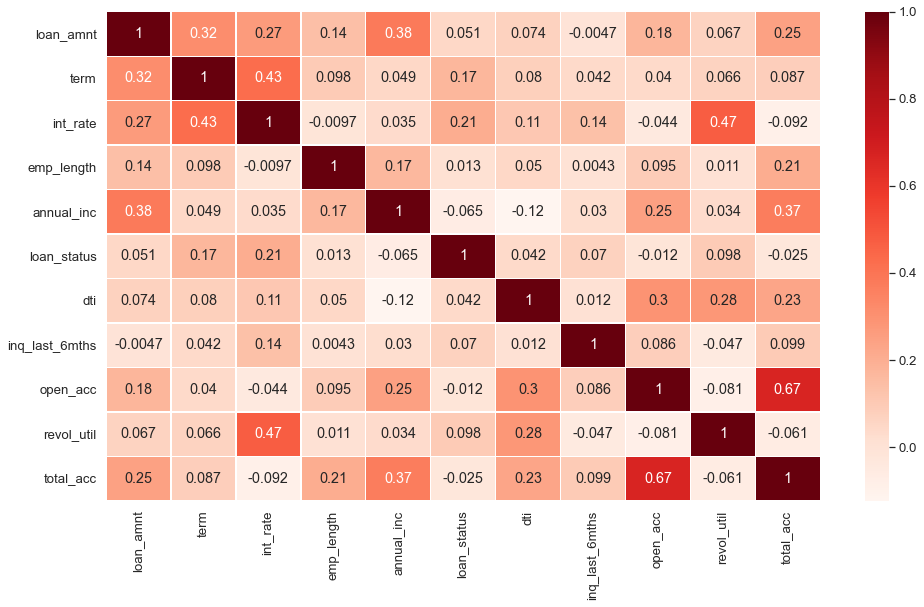

In [118]:
fig, ax = plt.subplots(figsize = (16, 9))

sns.heatmap(loan.corr(method ='pearson'), cmap ='Reds', linewidths = 0.30, annot = True)

### Observation:

#### None of the identified factors show collinearity between themselves hence they are valid factors.

### Inference: 
### int_rate, term, revol_util, annual_inc, and loan_amnt are the top five driving factors based on the heatmap.